In [ ]:
# import stim
import matplotlib as mpl
from scipy.interpolate import griddata
mpl.rcParams['results/figure.dpi']=400
import numpy as np
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams.update({'font.size': 24})
from tqdm import tqdm
import pandas as pd
import os
import scipy
'''
To install stim and run it from jupyter notebooks on the local computers:
-Create a virtual environment with python (online documentation works easily)
-pip install ipykernel
- pass the virtual environment name to the command 
        `python -m ipykernel install --user  --name=[name of the environment]`
-launch jupyter `jupyter notebook`
'''
print('Libraries imported')

Libraries imported


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

def coloured_errorbar(x, y, errors, ax_e, alpha_val, label_name):

    # Parameters for colormap normalization
    # minimum and maximum extracted from QFI phase diagram with L=64
    vmin = 0.7982280778868343
    vmax = 63.143151725037775
    levels = np.concatenate(([0.8, 0.85], np.logspace(0, 1.8, 199)), axis=0)

    # Normalize the y-values for colormap
    norm=mcolors.SymLogNorm(linthresh=0.0001, linscale=0.5, vmin=vmin, vmax=vmax)
#     norm = mcolors.Normalize(vmin = min(y), vmax=max(y))
    cmap = cm.coolwarm

    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection
    lc = LineCollection(segments, cmap=cmap, norm=norm,alpha=alpha_val, label=label_name)
    lc.set_array(y)
    lc.set_linewidth(2)


    # Add the LineCollection to the plot
    ax_e.add_collection(lc)

    # Plot the error bars with color mapping
    for i in range(len(x)):
        ax_e.errorbar(x[i], y[i], yerr=errors[i], 
                      color=cmap(norm(y[i])), alpha=alpha_val)



# Figure 2

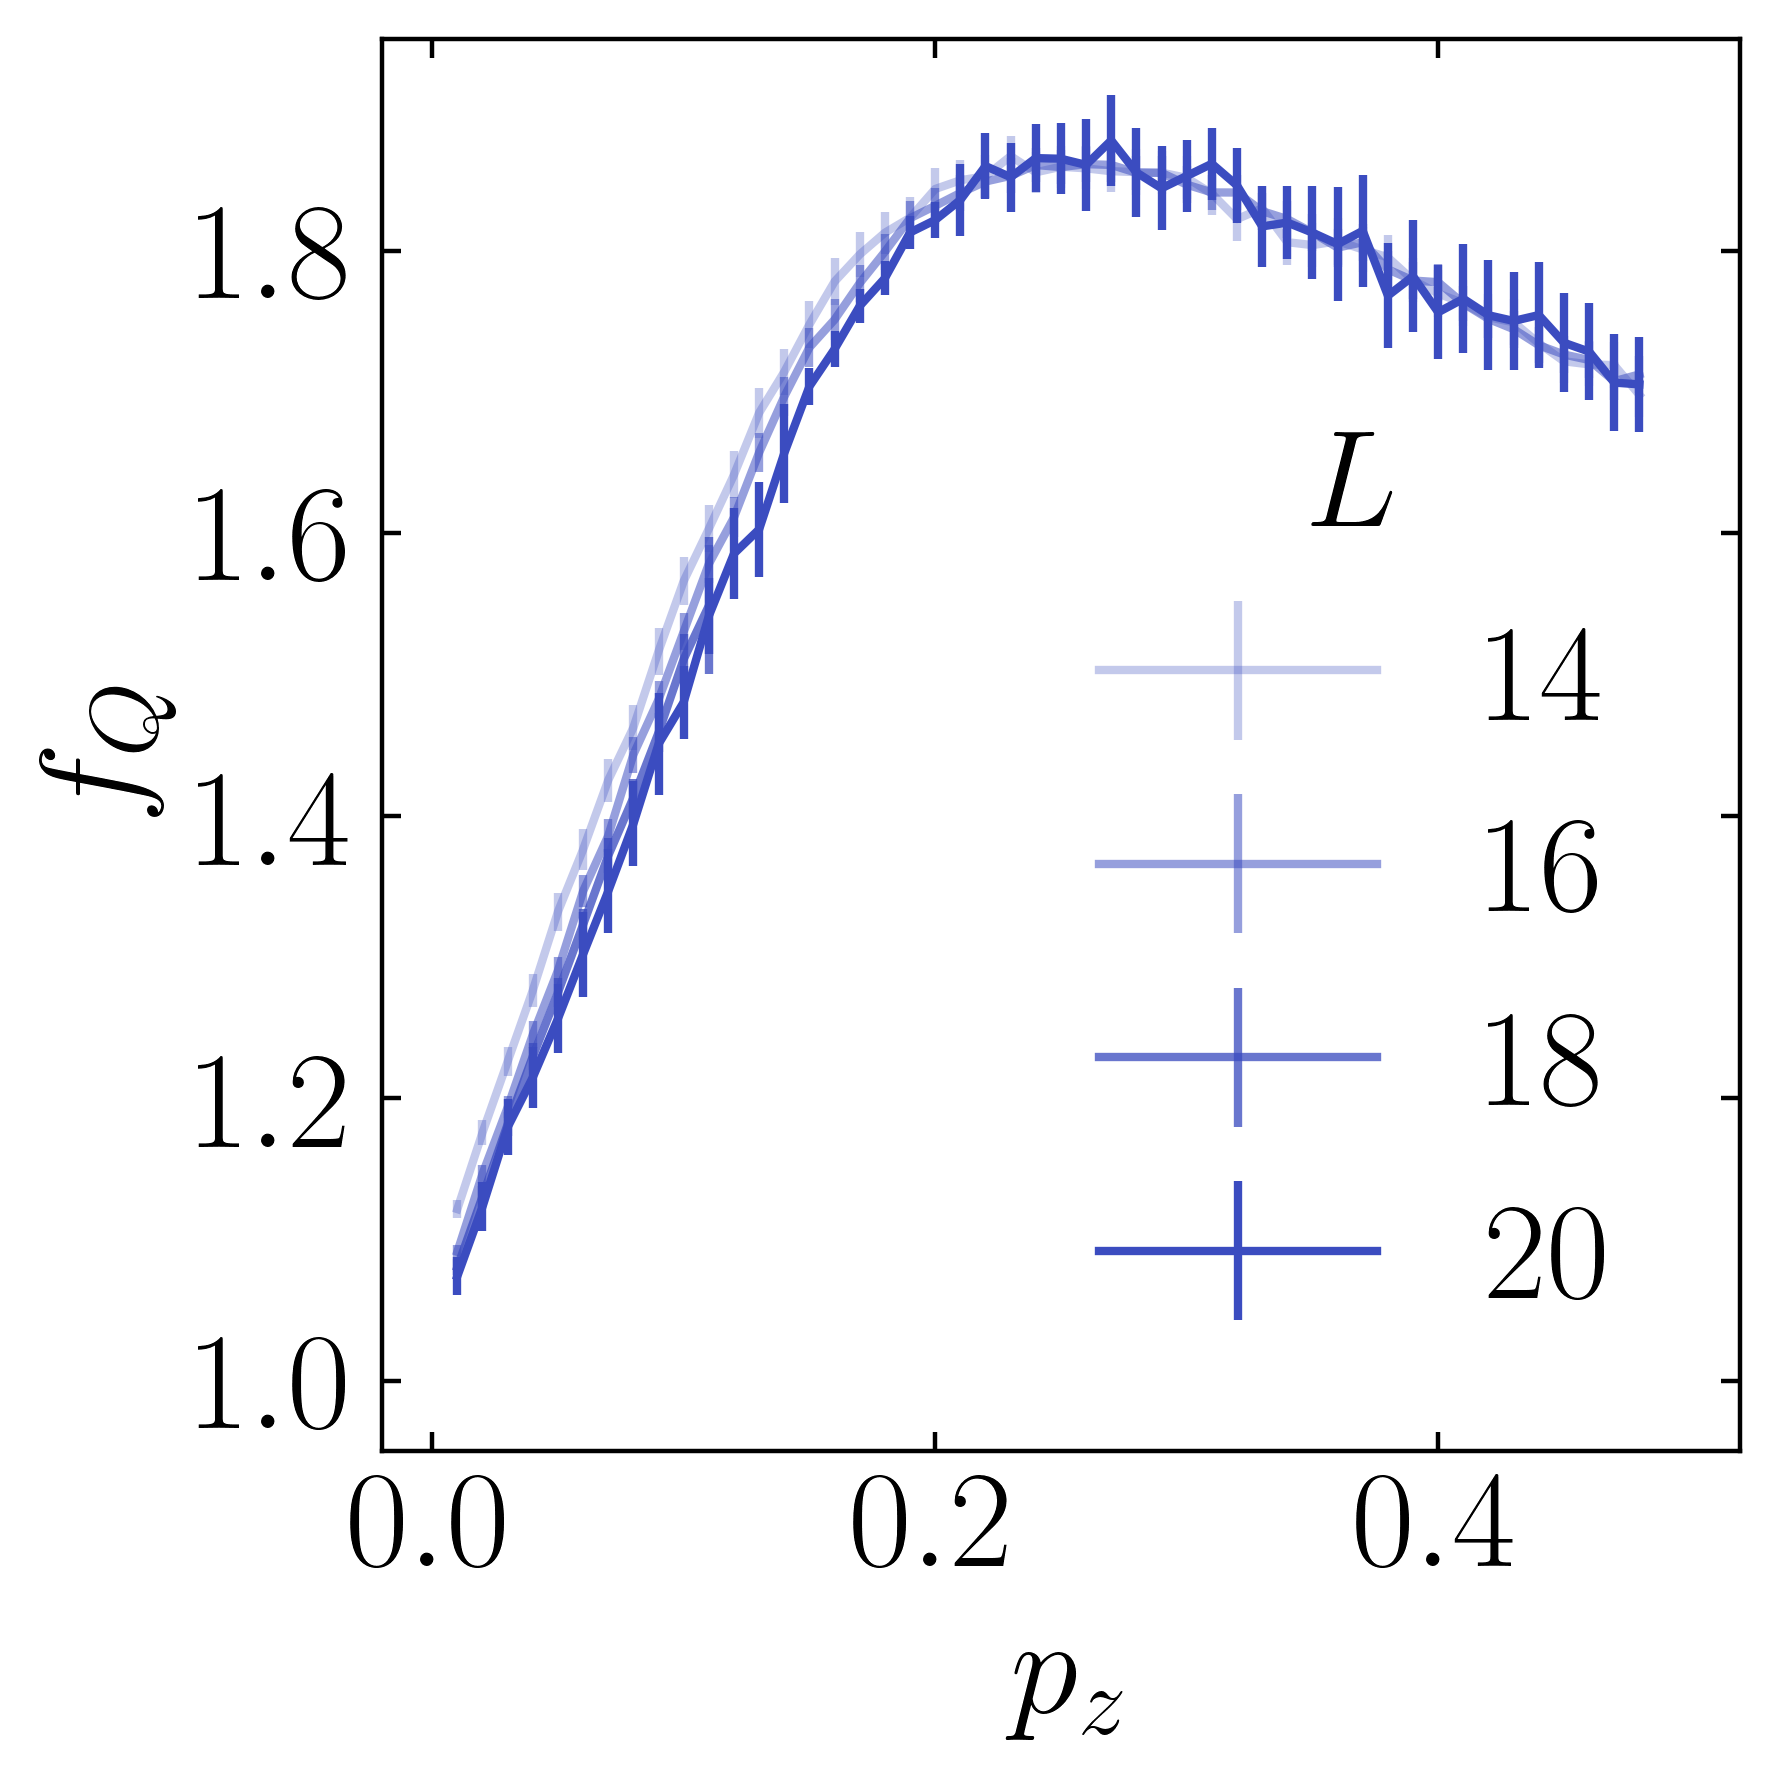

In [ ]:
Ls = [14, 16, 18, 20]
mpl.rcParams.update({'font.size': 25})
color = '#3B4CC0'
alphas = np.linspace(0.3, 1, len(Ls))
df = pd.read_csv('results/fig2a.csv')
fig, ax = plt.subplots(figsize=(5,5))
for l_pos,L in enumerate(Ls):
    dfx = df[(df.L==L) & (df.p<=0.5)]
    x = dfx.p.values
    y = dfx.qfi_mean.values
    err_y = dfx.qfi_std.values
    ax.errorbar(x, y, err_y, alpha=alphas[l_pos], label=f'${L}$', color=color)

ax.set_ylim((0.95, 1.95))
ax.set_xlim((-0.02, 0.52))

ax.legend(loc='lower right', framealpha=0.0, frameon=False, title='$L$', title_fontsize='medium')
ax.set_xlabel(r'$p_z$')
ax.set_ylabel(r'$f_Q$') 


plt.tick_params(axis = 'both', which = 'both', direction = 'in', top = True, right = True)
plt.tight_layout()
plt.show()

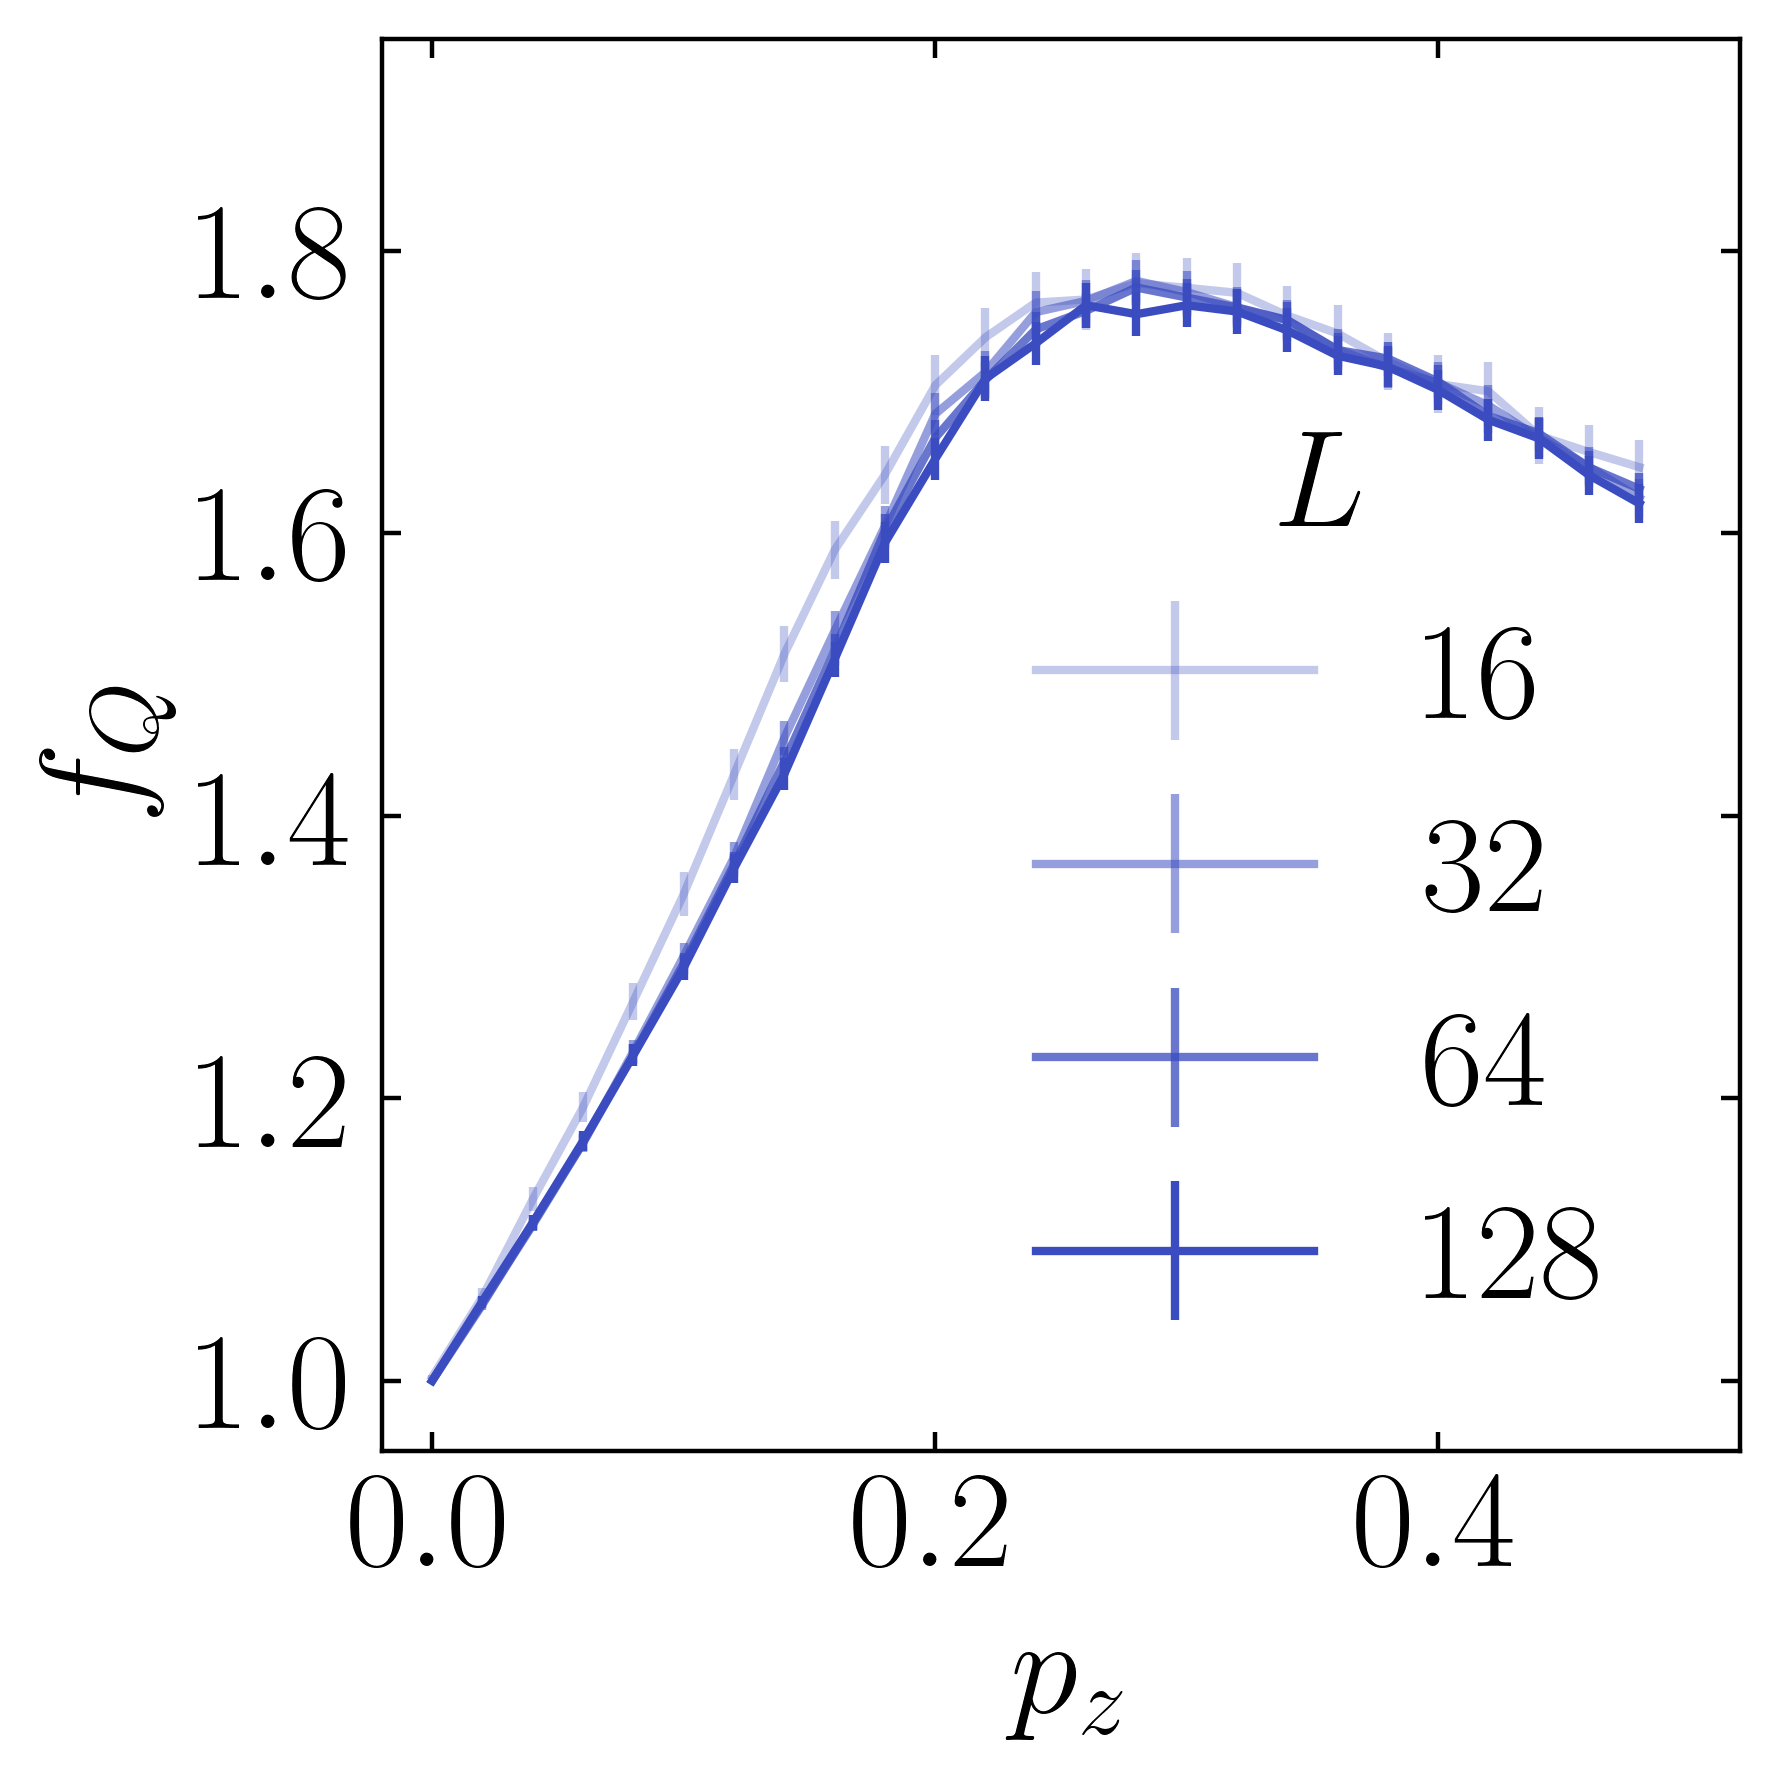

In [ ]:
Ls = [16, 32, 64, 128]
mpl.rcParams.update({'font.size': 25})
color = '#3B4CC0'
alphas = np.linspace(0.3, 1, len(Ls))
fig, ax = plt.subplots(figsize=(5,5))
df = pd.read_csv('results/fig2b.csv')
for l_pos,L in enumerate(Ls):
    dfx = df[(df.L==L) & (df.p<=0.5)]
    x = dfx.p.values
    y = dfx.qfi_mean.values
    err_y = dfx.qfi_std.values
    ax.errorbar(x, y, err_y, alpha=alphas[l_pos], label=f'${L}$', color=color)

ax.set_ylim((0.95, 1.95))
ax.set_xlim((-0.02, 0.52))

ax.legend(loc='lower right', framealpha=0.0, frameon=False, title='$L$', title_fontsize='medium')
ax.set_xlabel(r'$p_z$')
ax.set_ylabel(r'$f_Q$') 


ax.tick_params(axis = 'both', which = 'both', direction = 'in',
               labelleft=True, top = True, right = True)
fig.tight_layout()
plt.show()

# Figure 3

a -0.7390553430064786+-0.030654218351111723,
b 1.5581675939619668+-0.009499667942790065
c 0.3332889131186583+-6.16841972473119e-05


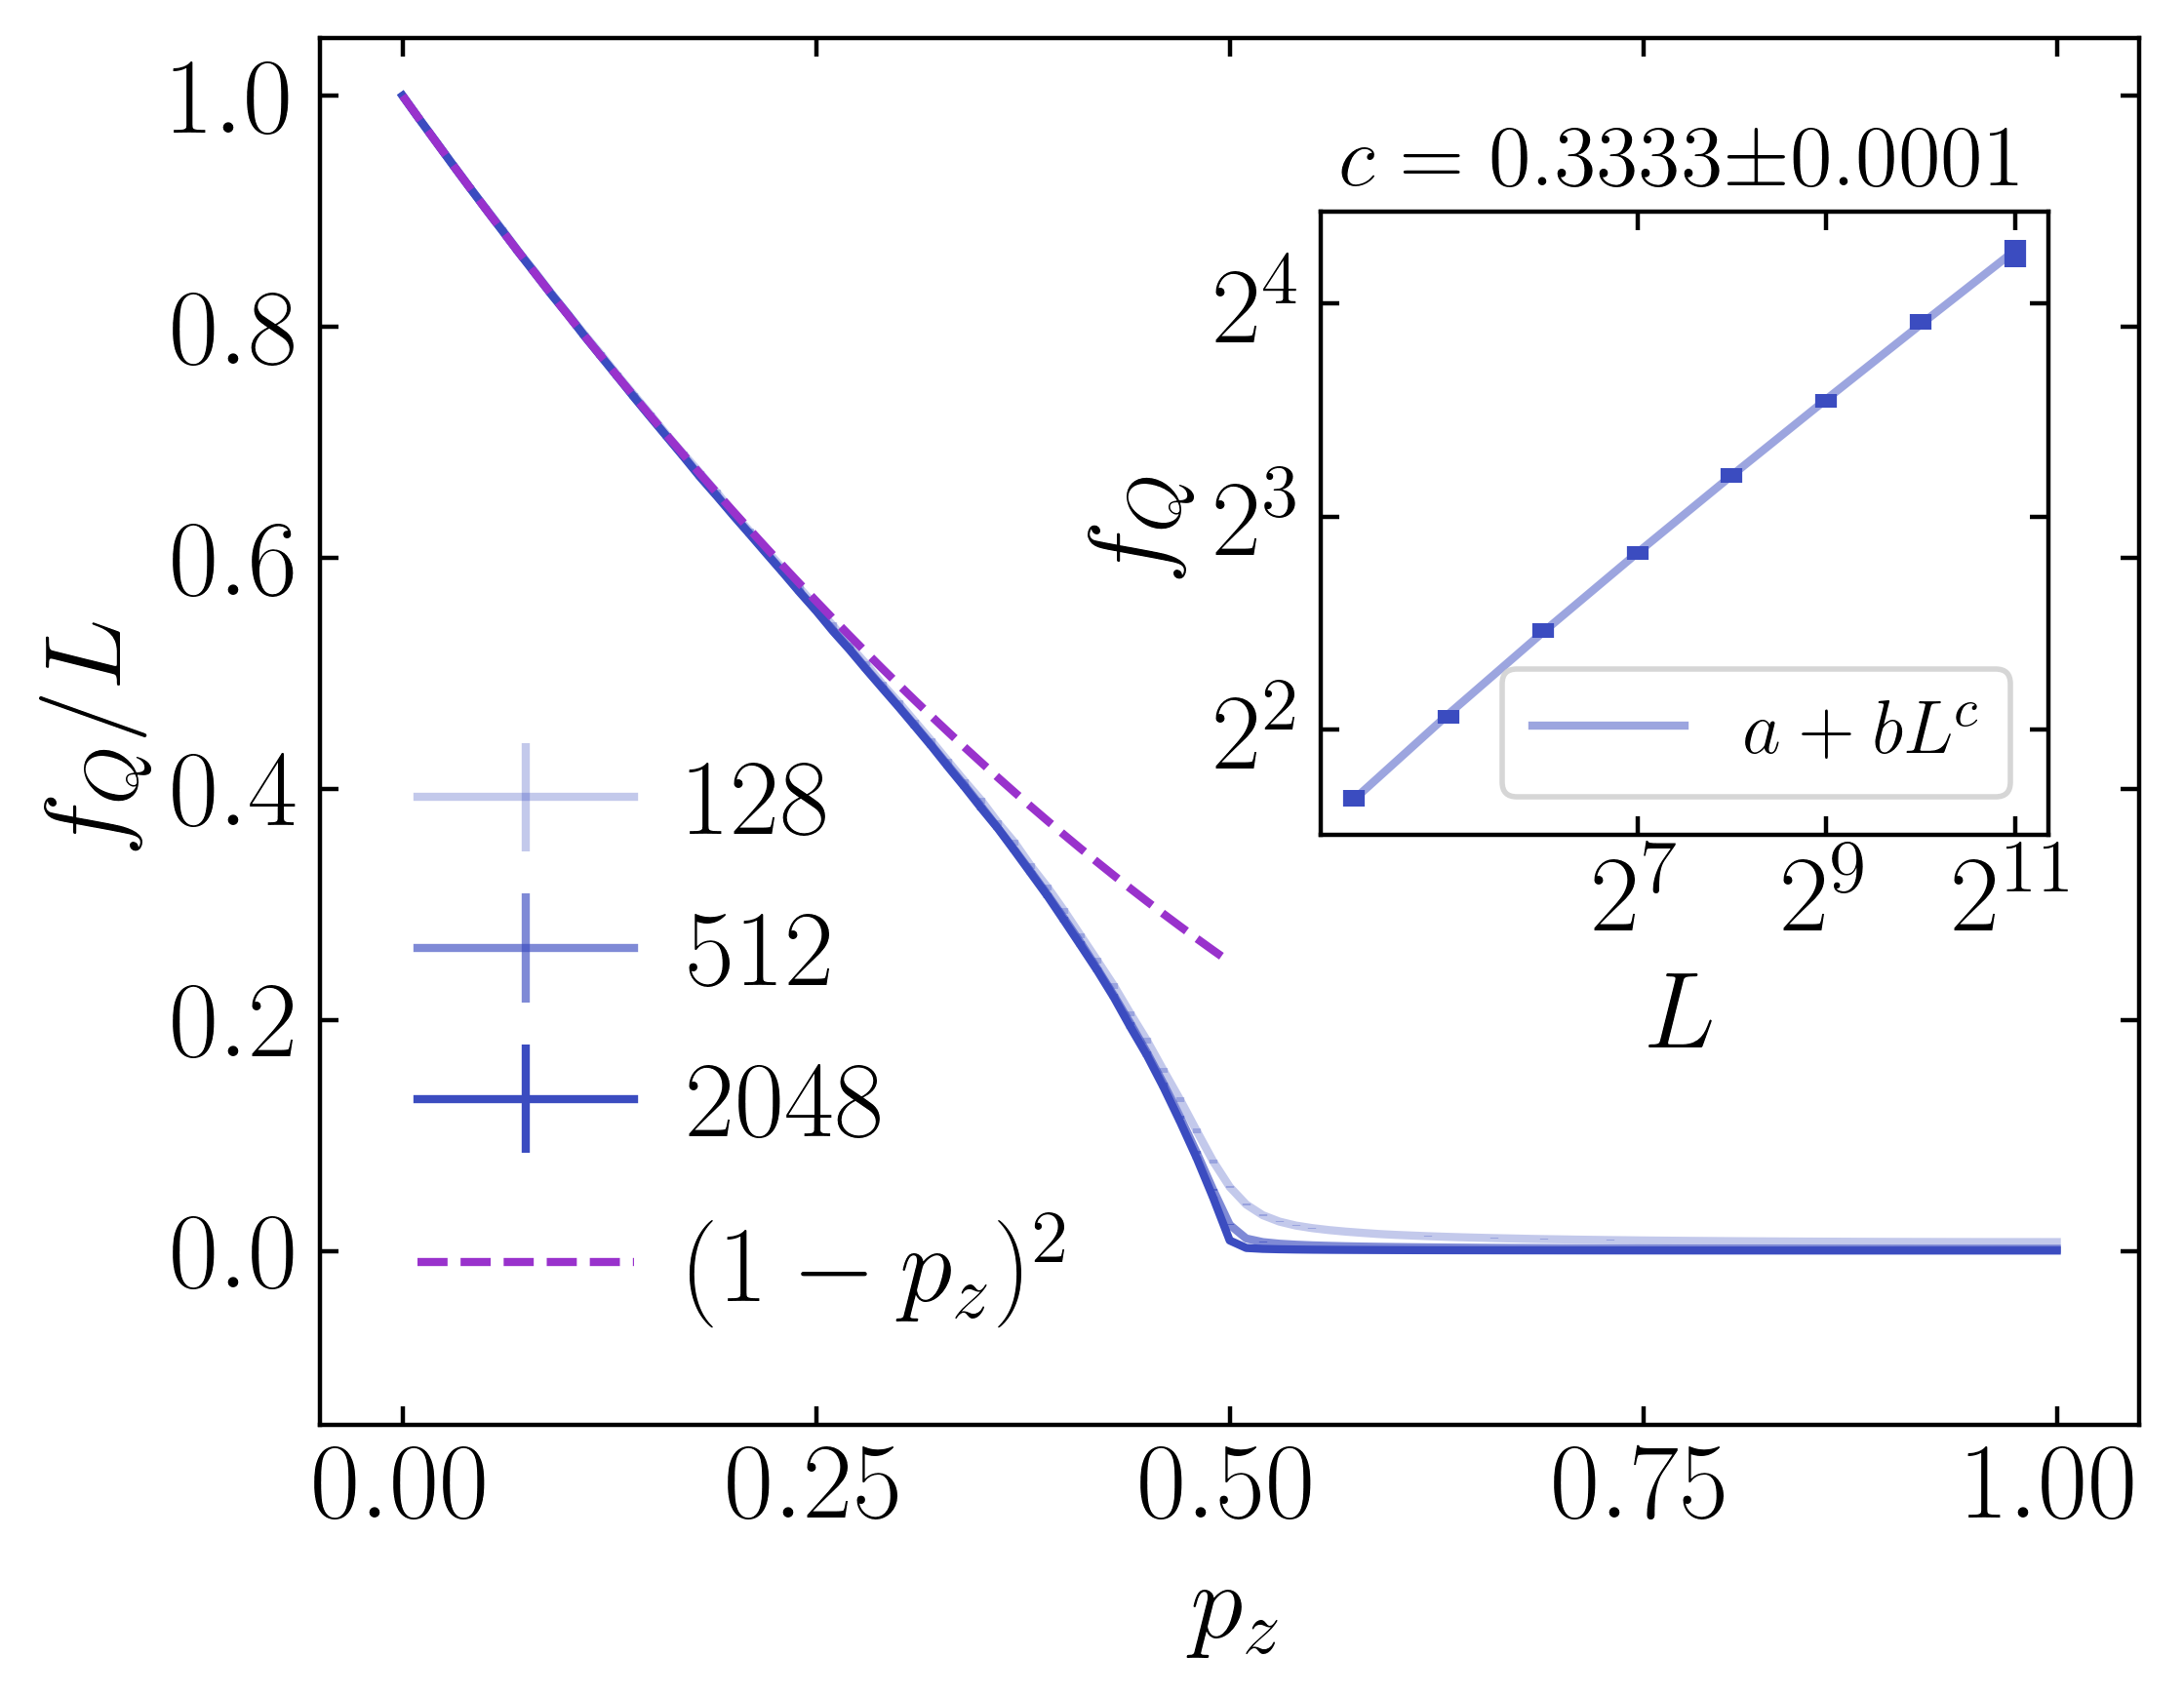

In [ ]:
mpl.rcParams.update({'font.size': 20})
color = '#3B4CC0'

def power_fit(x, a, b, c):
    return a + b * x ** c


f, ax = plt.subplots(figsize=(6,4.75))
axins = ax.inset_axes([0.55, 0.425, 0.4, 0.45])
axs = [ax, axins]

Ls = [128, 512, 2048]
alphas = np.linspace(0.3, 1, len(Ls))
df = pd.read_csv('results/fig3.csv')
for L, alpha in zip(Ls, alphas):
    dfx = df[(df.L==L)]
    x = dfx.p.values
    y = dfx.qfi_mean.values / L
    err_y = dfx.qfi_std.values / L
    plt.errorbar(x, y, err_y, label=f'${L}$', color=color, alpha=alpha)
    


axs[0].set_xlabel(r'$p_z$')
axs[0].set_ylabel(r'$f_Q/L$')
axs[0].set_ylim((-.15,1.05))

ps = np.linspace(0, 0.5, 51)

axs[0].plot(ps, (1-ps)**2 + ps/2048, c='darkorchid', linestyle='dashed', linewidth=1.5, zorder=3, label=r'$(1-p_z)^2$')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,0]
axs[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left',
             framealpha=0.0, frameon=False, borderaxespad=0.5, handletextpad=0.5)
      
axs[0].tick_params(axis = 'both', which = 'both', direction = 'in', top = True, right = True)
    
dfx = df[(df.p == 0.50)]
x = dfx.L.values
y = dfx.qfi_mean.values
err_y = dfx.qfi_std.values
axs[1].errorbar(x, y, err_y, color=color, ls='', elinewidth=4, zorder=2)
y0 = y[0]
x0 = x[0]

popt, pcov = scipy.optimize.curve_fit(power_fit, x, y, sigma=err_y,
                                      absolute_sigma=False, p0 = [0, x0/y0, 0.33])
a,b,c = popt
sa, sb, sc = np.diag(pcov)

axs[1].set_xlabel(r'$L$')
axs[1].set_ylabel(r'$f_Q$') 
axs[1].set_yscale('log', base=2)                 
axs[1].set_xscale('log', base=2)
axs[1].set_title(f'$c={c:.4f}$' + r'$\pm$' + f'${sc:.4f}$', fontsize=16)
axs[1].plot(x, power_fit(x, a, b, c), c=color, linewidth=1.5, alpha=.5, label=r'$a+b L^c$', zorder=1)
axs[1].legend(fontsize=14, loc='lower right')
axs[1].set_xticks(ticks=[128, 512, 2048])
axs[1].tick_params(axis = 'both', which = 'both', direction = 'in', top = True, right = True)
print('a {}+-{},\nb {}+-{}\nc {}+-{}'.format(a, sa, b, sb, c, sc))


plt.tight_layout()
plt.show()

# Figure 4

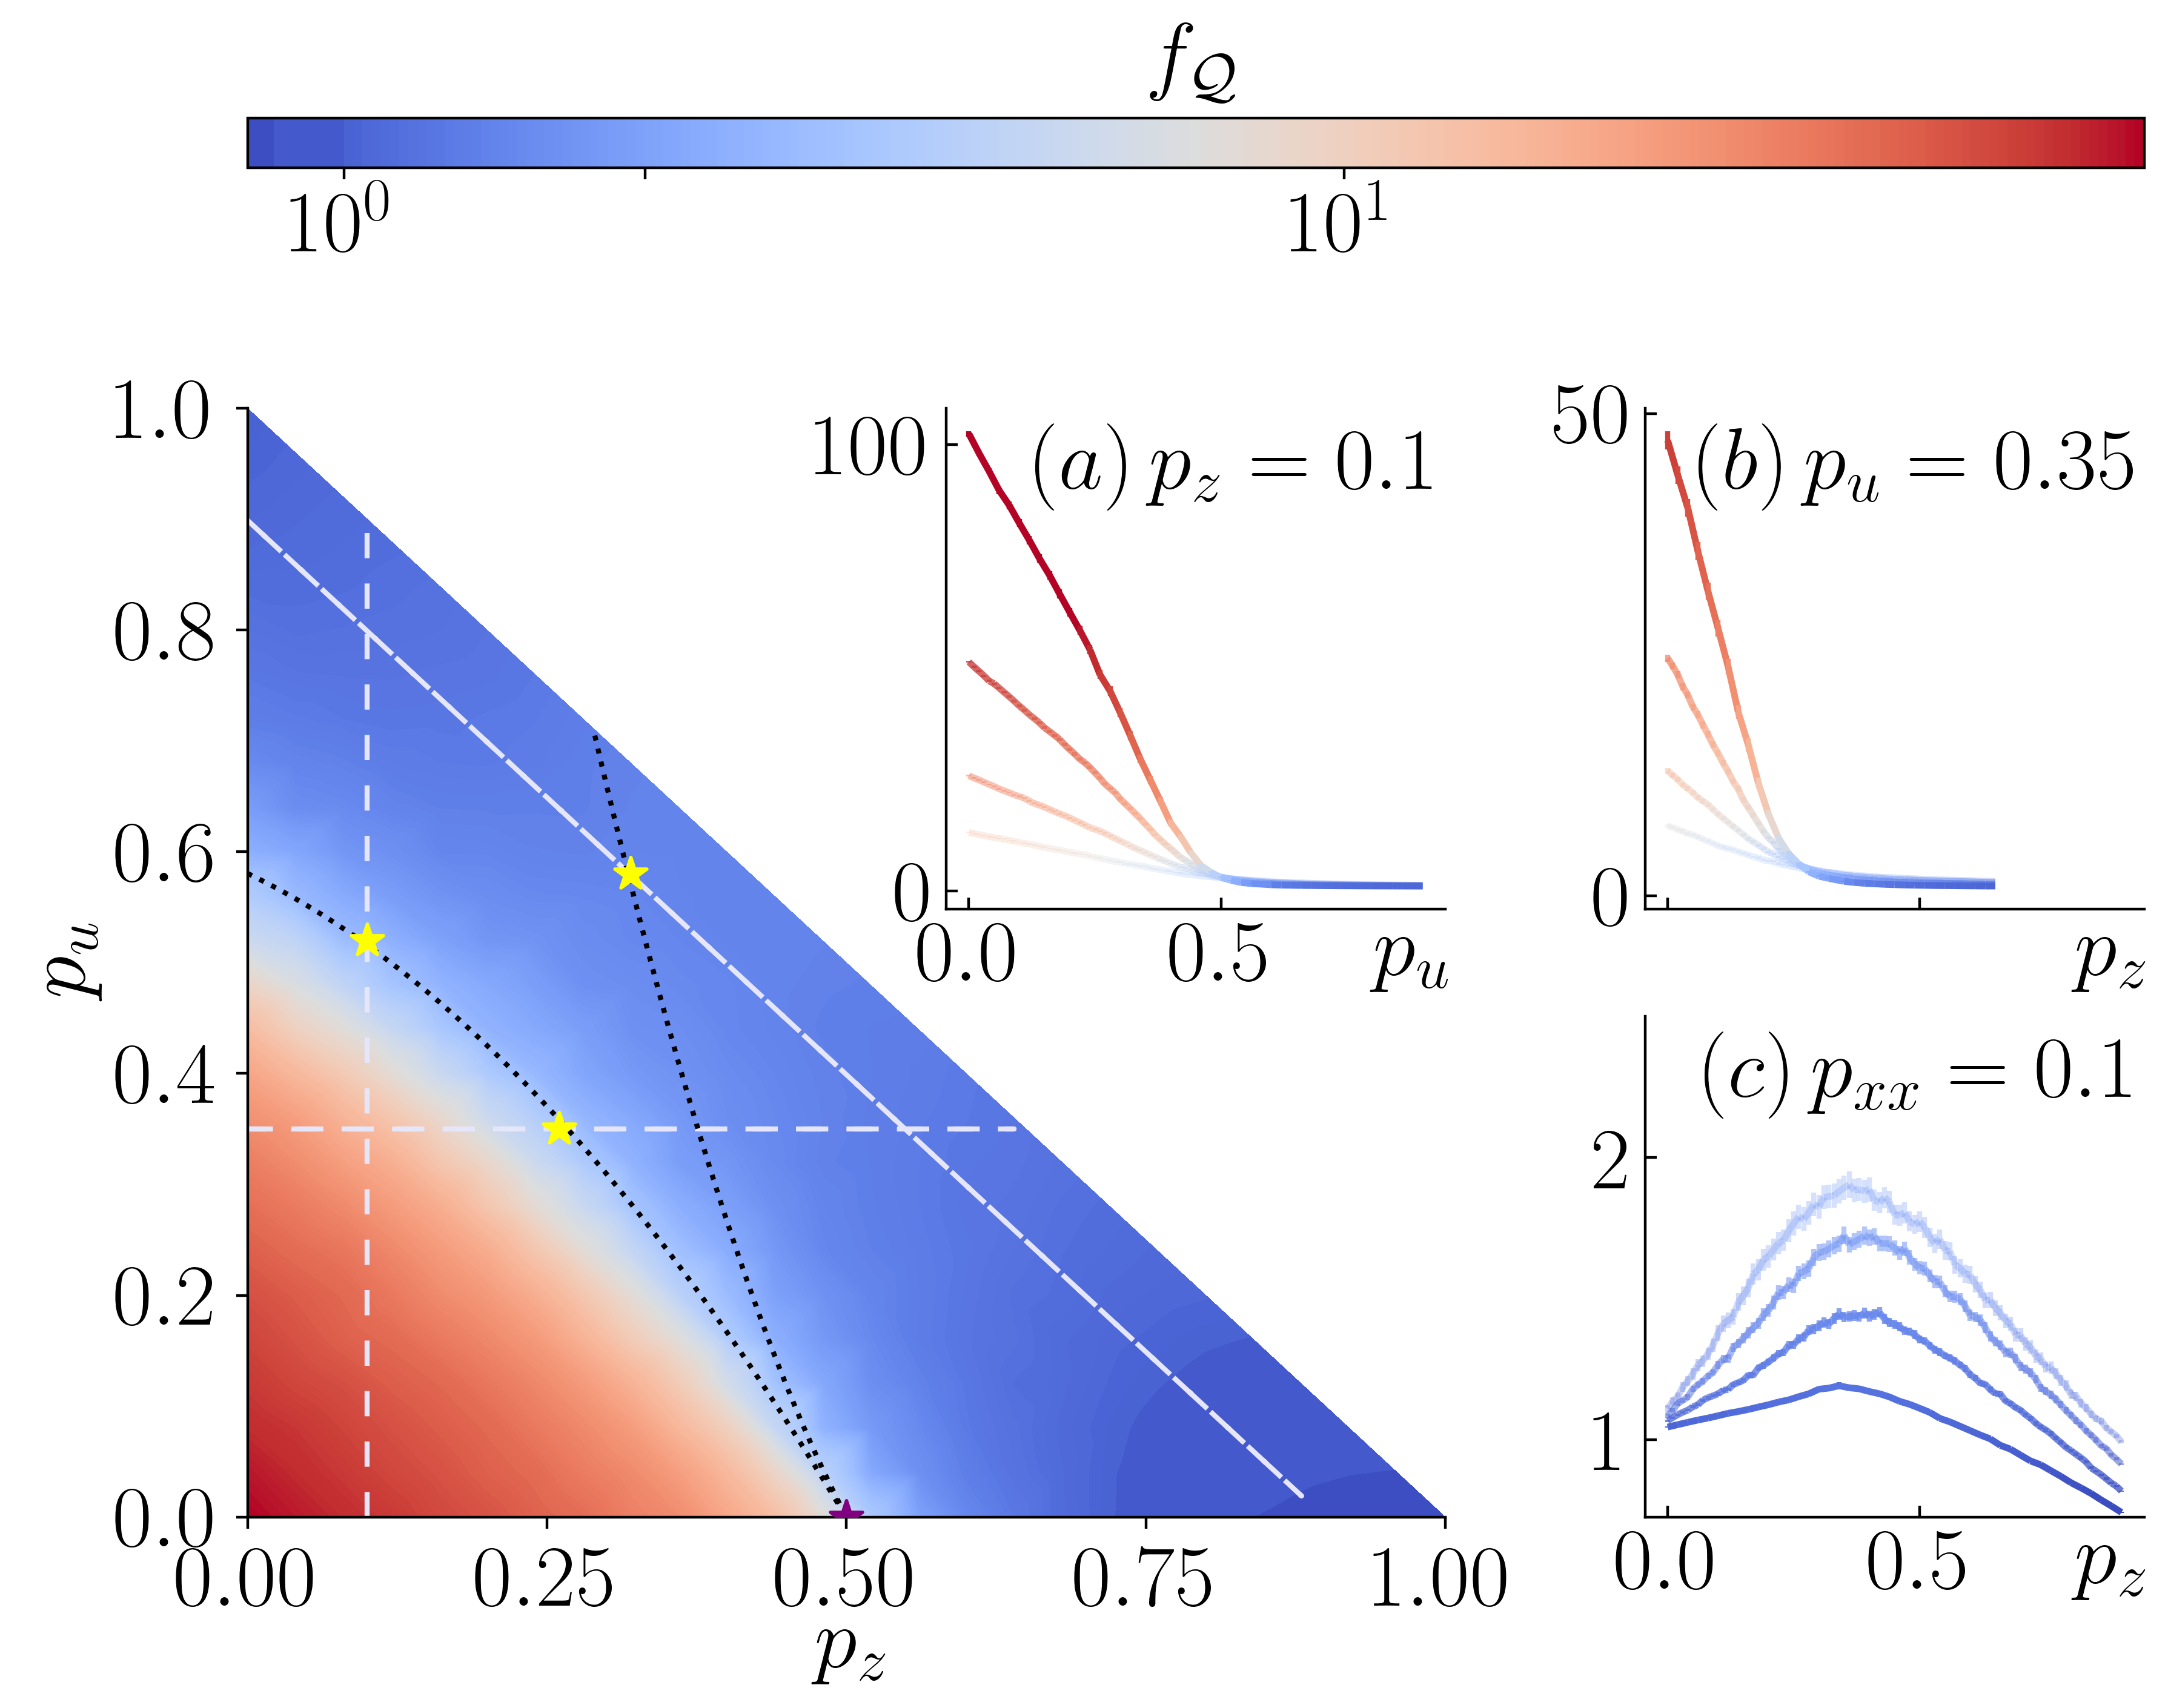

In [ ]:
mpl.rcParams.update({'font.size': 26})
# Create the main figure and grid
fig = plt.figure(figsize=(10.1, 7.5))
grid = plt.GridSpec(4, 3, height_ratios=(0.1,0.05, 1, 1), hspace=0.1, wspace=0.4, )

# Main plot---------------------------------------------------------------------------------------------------
main_ax = fig.add_subplot(grid[2:, :2])

# entanglement data of surface

df = pd.read_csv('results/fig4main.csv')

surf = []
for row in df.iterrows():

    surf.append([row[1]['pz'], row[1]['pu'], row[1]['qfi_mean']])

surf = np.array(surf)


x = surf[:, 0]
y = surf[:, 1]
z = surf[:,2]

grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 300), np.linspace(0, 1, 300))

grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
lvls = np.concatenate(([0.8, 0.85], np.logspace(0, 1.8, 199)), axis=0)
cont = main_ax.contourf(grid_x, grid_y, grid_z, levels=lvls, 
                 cmap='coolwarm', norm='log')

cl = 'lavender'
lis=(0, (5,5))
main_ax.vlines(0.1, 0, 0.901, color=cl, linestyle=lis)
main_ax.plot(x[x<=0.901], 0.899-x[x<=0.901], c=cl, linestyle=lis)
main_ax.plot(x[x<=0.65], 0.35+0*x[x<=0.65], c=cl, linestyle=lis)

for x,y in [(0.1,0.52), (0.32, 0.58), (0.26, 0.35)]:
    main_ax.scatter(x, y, color='yellow', marker='*', zorder=5, s=100)
main_ax.scatter(0.5, 0.0, color='purple', marker='*', zorder=5, s=100)


# tmi 

# from fitting the points (0, 0.579), (0.1, 0.518), (0.121, 0.5), (0.5,0), (0.257, 0.36) 
    #to a 2nd order polynomial curve
x1 = np.linspace(0, 0.50, 51)
main_ax.plot(x1, -1.28604 * x1**2 -0.518898 * x1 + 0.580525, linestyle='dotted', c='k')

# from fitting the points (0.5, 0), (0.303, 0.6), (0.338, 0.5), (0.3, 0.7) to a 2nd order polynomial
x2 = np.linspace(0.29, 0.5, 201)
main_ax.plot(x2, 6.18344*x2**2-8.24037*x2+2.57447, linestyle='dotted', c='k')

main_ax.tick_params(pad=5)
main_ax.spines[['right', 'top']].set_visible(False)
main_ax.set_ylabel(r'$p_u$')
main_ax.set_xlabel(r'$p_z$', labelpad=-5)
main_ax.set_ylim((0,1))

top_cb_ax = fig.add_subplot(grid[0, :])
cb = fig.colorbar(cont, cax=top_cb_ax, orientation='horizontal', ticks=[1e0, 2e0, 1e1, 1e2],
             format=mpl.ticker.LogFormatterSciNotation())#, label=r'$f_\mathcal{Q}$')
cb.set_label(r'$f_\mathcal{Q}$', labelpad=10)
cb.ax.xaxis.set_label_position('top')

# Top center subplot -----------------------------------------------------------------------------------------
top_center_ax = fig.add_subplot(grid[2, 1])

Ls = [16, 32, 64, 128]#, 256]
alphas = np.linspace(0.3, 1, len(Ls))

df = pd.read_csv('results/fig4a.csv')
for l_pos,L in enumerate(Ls):
    if L<128:
        dfx = df[(df.L==L) & (df.pu<=0.9)]
    else:
        criterion = df['pu'].map(lambda x: np.isclose(int(x/0.02), x/0.02))
        dfx = df[(df.L==L) & criterion]

    ps = dfx.pu.values
    x = []
    y = []
    err_y = []
    for p in sorted(set(ps)):
        dfp = dfx[(dfx.pu==p)]
        original_y = dfp.qfi.values
        
        
        batch_size = len(original_y)//10

        smooth_data = [np.mean([original_y[i:i+batch_size] for i in range(0, len(original_y)-batch_size, batch_size)], axis=0)]
        smooth_err = [np.std([original_y[i:i+batch_size] for i in range(0, len(original_y)-batch_size, batch_size)], axis=0)]

        x.append(p)
        y.append(np.mean(smooth_data))
        err_y.append(np.mean(smooth_err)/np.sqrt(batch_size))

    line = coloured_errorbar(x, y, err_y, top_center_ax, alphas[l_pos], f'${L}$')
                
top_center_ax.tick_params(axis = 'both', which = 'both', direction = 'in', top = False, right = False)
top_center_ax.set_xlabel(r'$p_u$')
top_center_ax.xaxis.set_label_coords(.925, -.01)
top_center_ax.set_title(r'$(a) \, p_{z}=0.1$', loc='right', y=0.8, fontsize='medium')
top_center_ax.spines[['right', 'top']].set_visible(False)

# Top right subplot-----------------------------------------------------------------------------------------
top_right_ax = fig.add_subplot(grid[2, 2])

Ls = [16, 32, 64, 128]#, 256]
alphas = np.linspace(0.3, 1, len(Ls))
df = pd.read_csv('results/fig4b.csv')
for l_pos,L in enumerate(Ls):
    dfx = df[(df.L==L) & (df.pz<=1-0.35)]
    ps = dfx.pz.values
    if L==256:
        print(np.unique(ps))
    x = []
    y = []
    err_y = []
    for p in sorted(set(ps)):
        dfp = dfx[(dfx.pz==p)]
        original_y = dfp.qfi.values
        
        batch_size = len(original_y)//10

        smooth_data = [np.mean([original_y[i:i+batch_size] for i in range(0, len(original_y)-batch_size, batch_size)], axis=0)]
        smooth_err = [np.std([original_y[i:i+batch_size] for i in range(0, len(original_y)-batch_size, batch_size)], axis=0)]

        x.append(p)
        y.append(np.mean(smooth_data))
        err_y.append(np.mean(smooth_err)/np.sqrt(batch_size))

    line = coloured_errorbar(x, y, err_y, top_right_ax, alphas[l_pos], f'${L}$')
                
top_right_ax.tick_params(axis = 'both', which = 'both', direction = 'in', labelbottom=False,
                         top = False, right = False)

top_right_ax.set_xlabel(r'$p_z$')
top_right_ax.xaxis.set_label_coords(.925, -.01)
top_right_ax.set_title(r'$(b) \, p_{u}=0.35$', loc='right', y=0.8, fontsize='medium')
top_right_ax.spines[['right', 'top']].set_visible(False)

# Center right subplot-----------------------------------------------------------------------------------------
center_right_ax = fig.add_subplot(grid[3, 2], sharex=top_right_ax, alpha=0)

Ls = [16, 32, 64, 128]
alphas = np.linspace(0.3, 1, len(Ls))

df = pd.read_csv('results/fig4c.csv')
for l_pos,L in enumerate(Ls):
    if L<128:
        dfx = df[(df.L==L)]
    else:
        criterion = df['pz'].map(lambda x: np.isclose(int(x/0.02), x/0.02))
        dfx = df[(df.L==L) & criterion]
    ps = dfx.pz.values
    x = []
    y = []
    err_y = []
    for p in sorted(set(ps)):
        dfp = dfx[(dfx.pz==p)]
        original_y = dfp.qfi.values
        
        batch_size = len(original_y)//10

        smooth_data = [np.mean([original_y[i:i+batch_size] for i in range(0, len(original_y)-batch_size, batch_size)], axis=0)]
        smooth_err = [np.std([original_y[i:i+batch_size] for i in range(0, len(original_y)-batch_size, batch_size)], axis=0)]

        x.append(p)
        y.append(np.mean(smooth_data))
        err_y.append(np.mean(smooth_err)/np.sqrt(batch_size))
        

    line = coloured_errorbar(x, y, err_y, center_right_ax, alphas[l_pos], f'${L}$')
                
center_right_ax.tick_params(axis = 'both', which = 'both', direction = 'in', top = False, right = False)
center_right_ax.set_ylim((0.725, 2.5))
center_right_ax.set_xlabel(r'$p_z$')
center_right_ax.xaxis.set_label_coords(.925, -.01)
center_right_ax.set_title(r'$(c) \, p_{xx}=0.1$', loc='right', y=0.8, fontsize='medium')
center_right_ax.spines[['right', 'top']].set_visible(False)

grid.update(hspace=0.4)

plt.show()

# Figure 5a

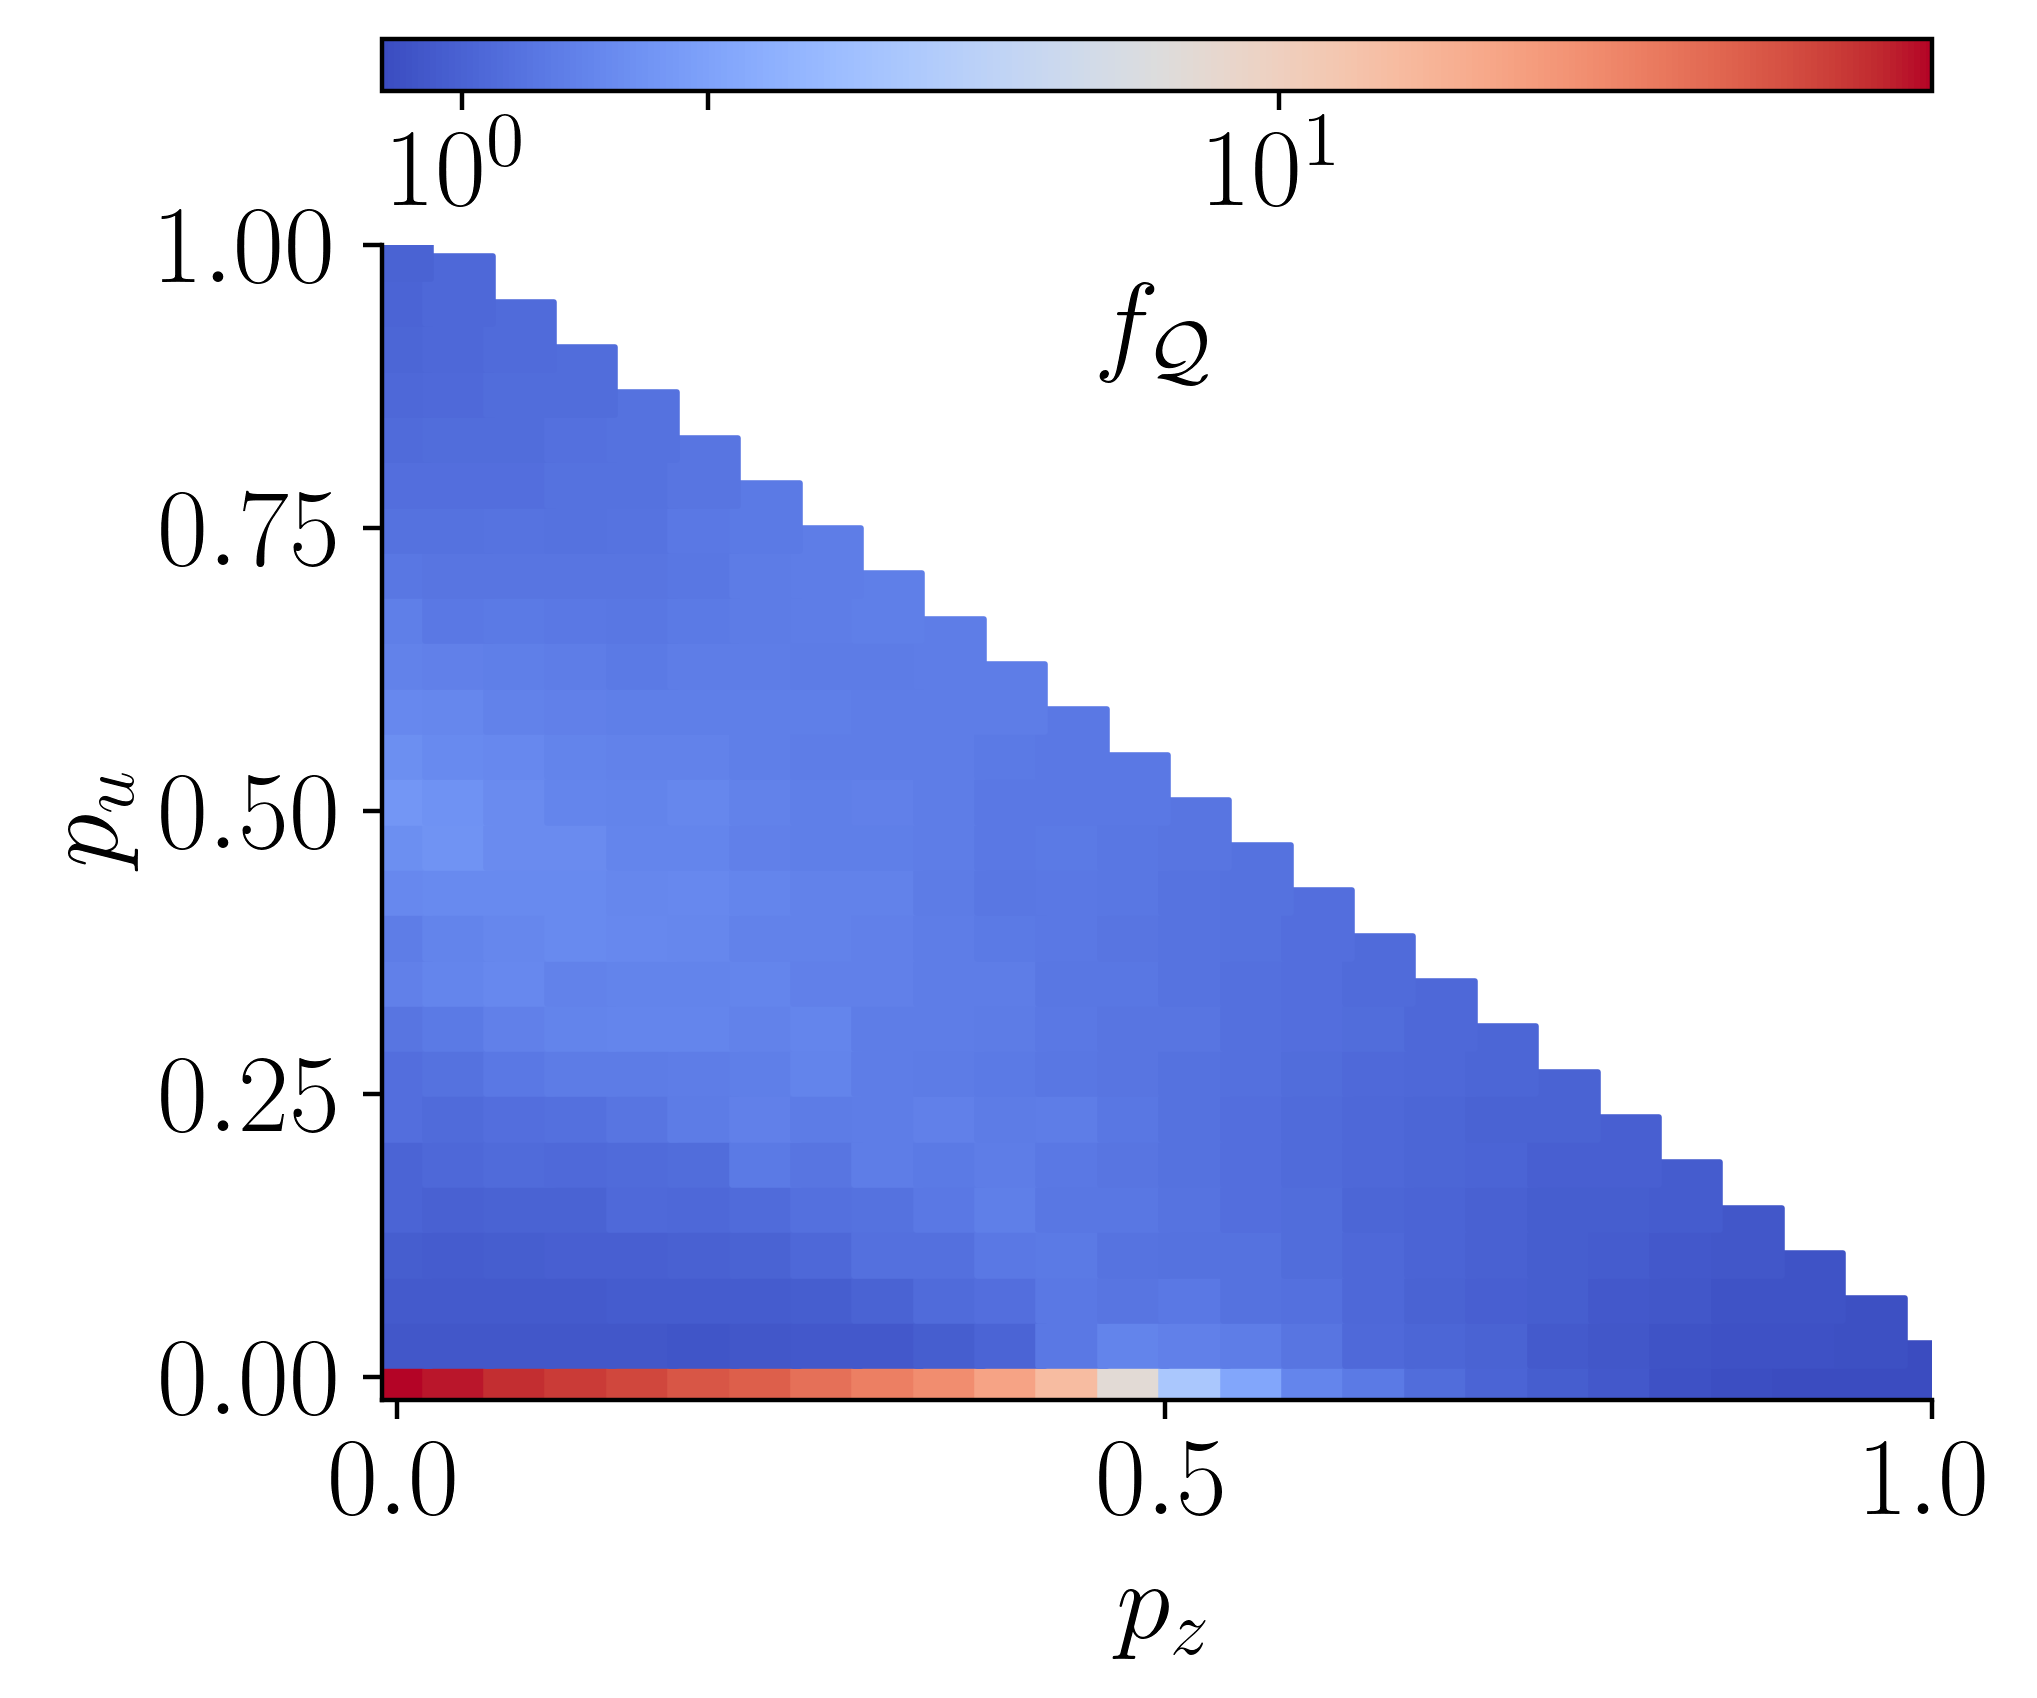

In [ ]:
mpl.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(5, 5))

df = pd.read_csv('results/fig5a.csv')

surf = []
for row in df.iterrows():

    surf.append([row[1]['pz'], row[1]['pu'], row[1]['qfi_mean']])

surf = np.array(surf)

x = surf[:, 0]
y = surf[:, 1]
z = surf[:,2]


lvls = np.concatenate(([0.7, 0.85], np.logspace(0, 1.8, 199)), axis=0)


cont = plt.scatter(x, y, c=z, marker='s', s=150,
                          cmap='coolwarm', norm=mpl.colors.SymLogNorm(linthresh=0.0001, linscale=0.5))

plt.xlim((-0.01,1))
plt.ylim((-0.02,1))

cb = fig.colorbar(cont, location='top', ticks=[1e0, 2e0, 1e1, 1e2], aspect=30, pad=0.1,
             format=mpl.ticker.LogFormatterSciNotation())
cb.set_label(r'$f_\mathcal{Q}$', labelpad=10)
cb.ax.xaxis.set_ticks_position('bottom')
cb.ax.xaxis.set_label_position('bottom')

plt.ylabel(r'$p_u$')
plt.xlabel(r'$p_z$')
ax.spines[['right', 'top']].set_visible(False)
plt.show()

# Figure 5b-c

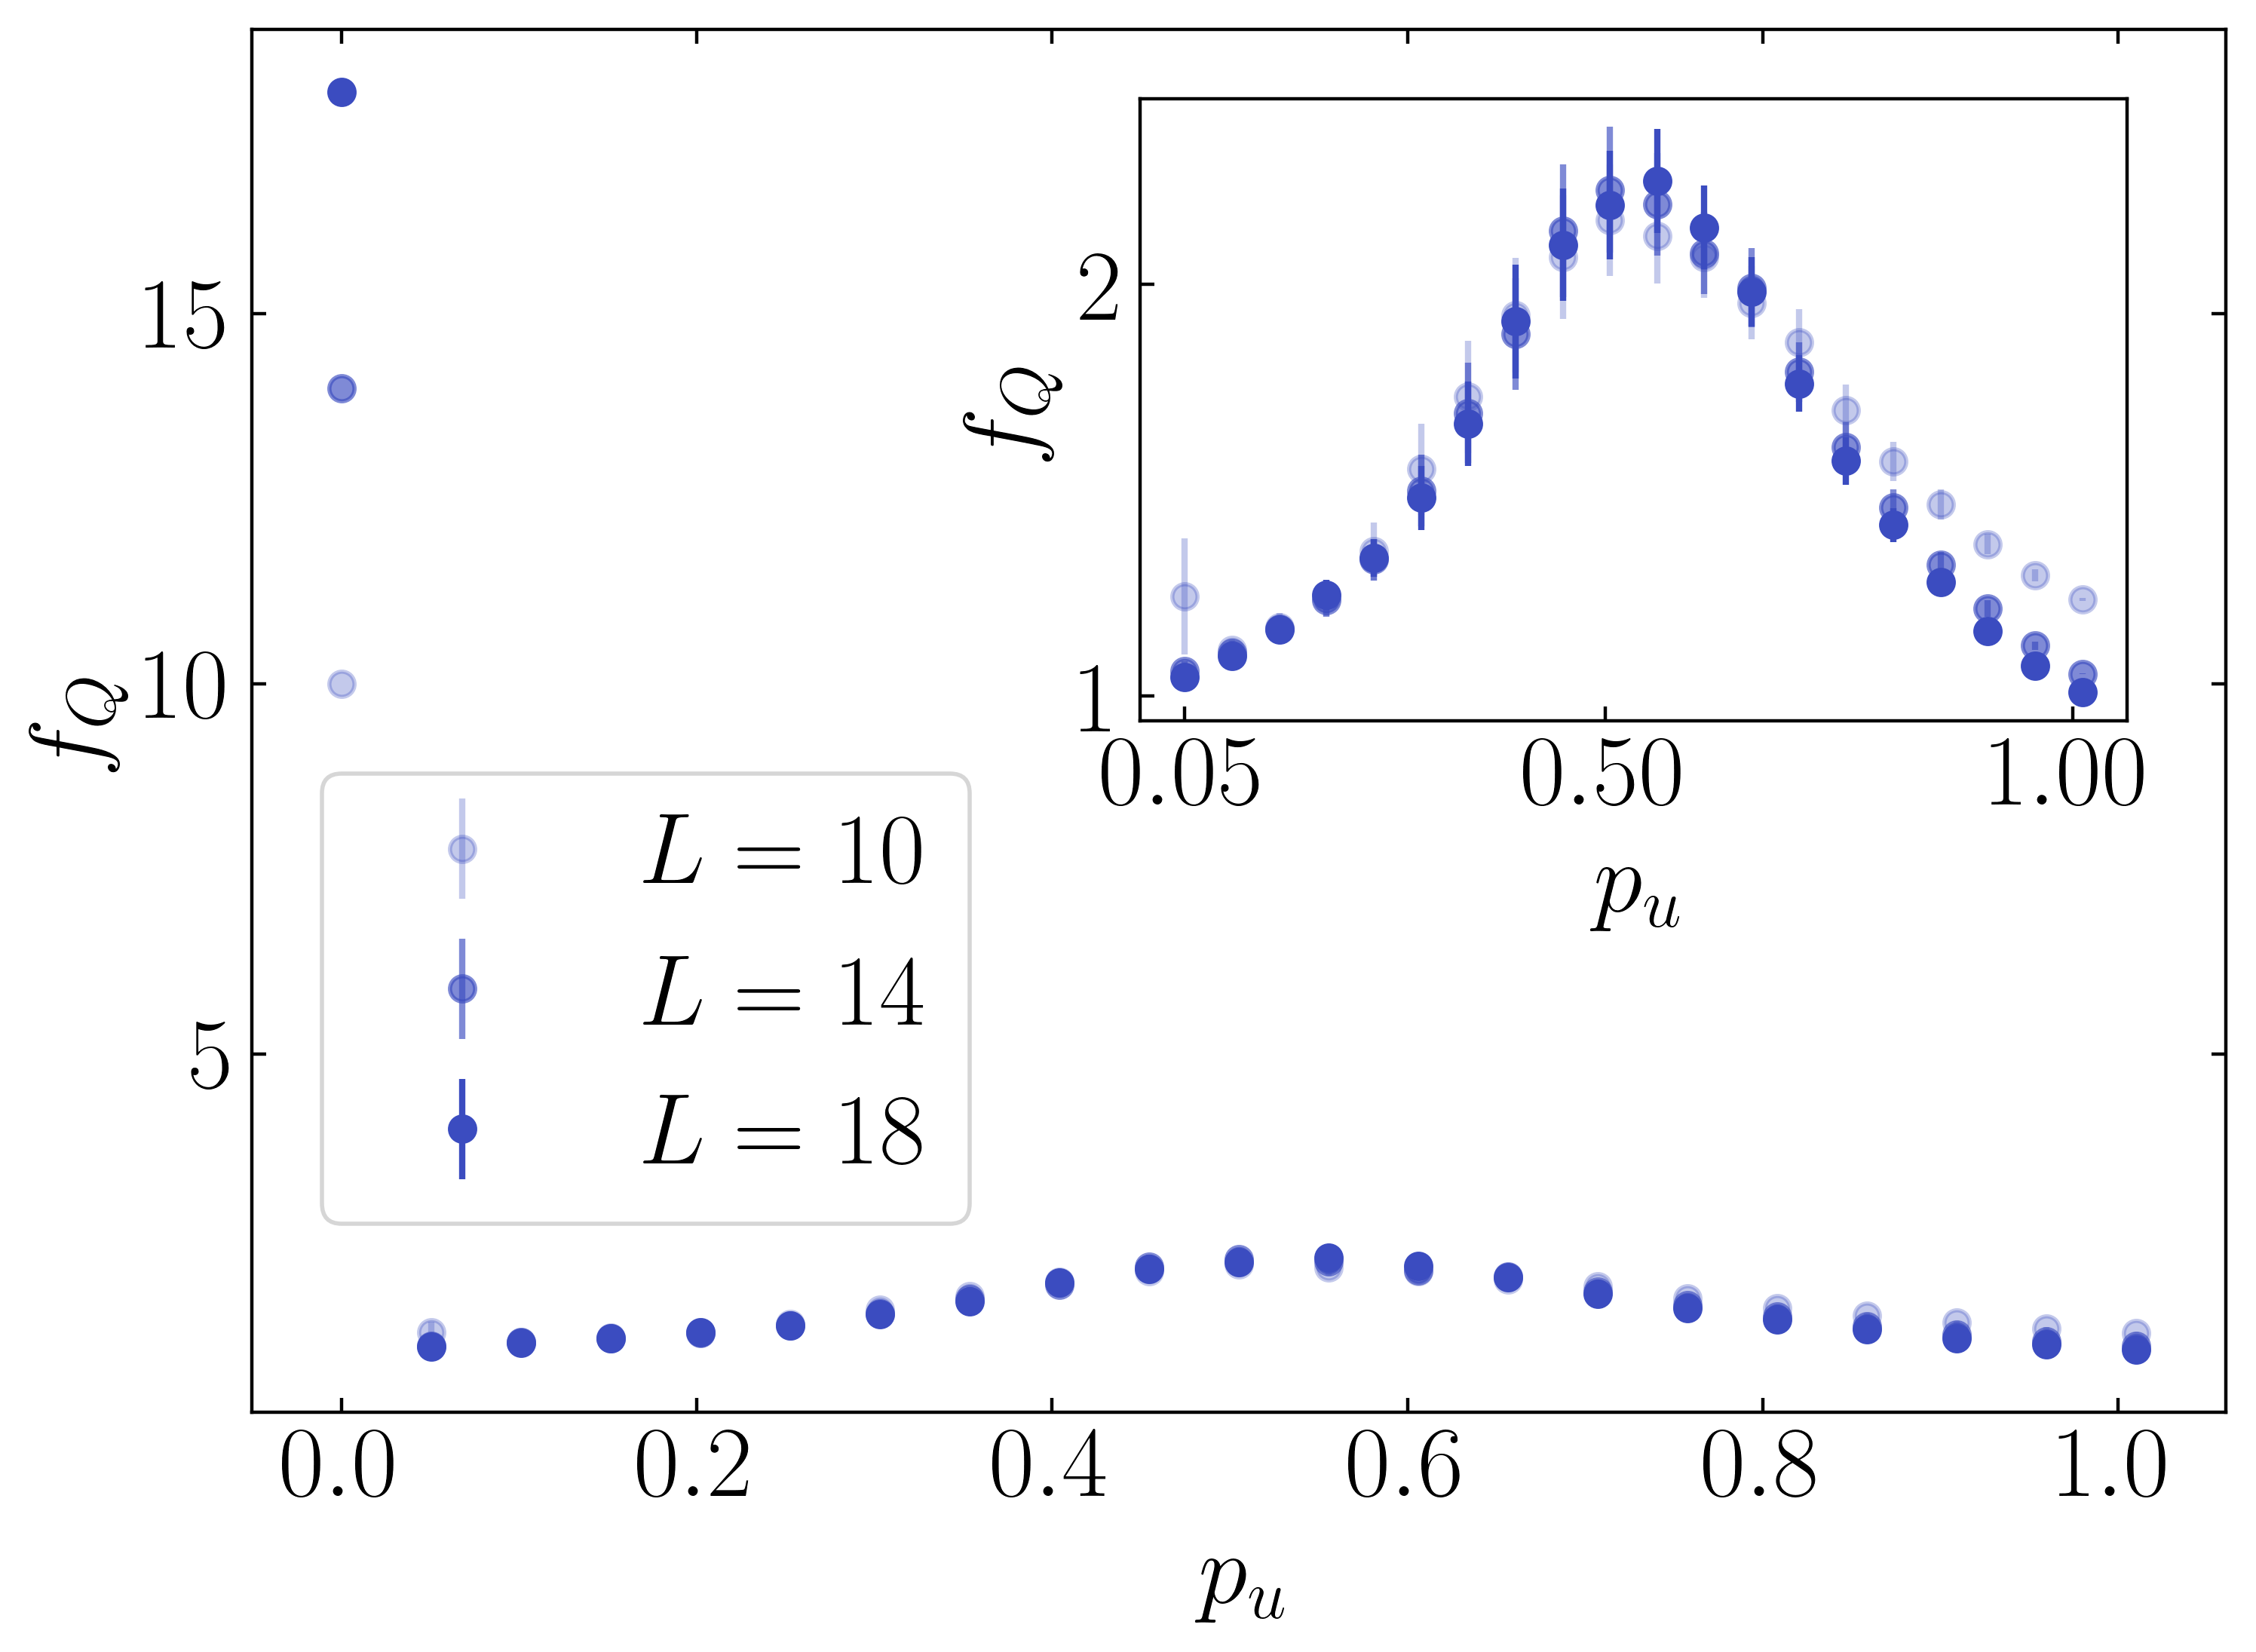

In [ ]:
mpl.rcParams['font.size'] = 24

Ls = [10, 14, 18]


df = pd.read_csv('results/fig5b.csv')

pu = np.linspace(0, 1, 21)
# Plot the results
f, ax = plt.subplots(figsize=(8, 6))
axins = ax.inset_axes([0.45, 0.5, 0.5, 0.45])
axs = [ax, axins]

color = '#3B4CC0'
alphas = np.linspace(0.3, 1, len(Ls))

for L_idx, L in enumerate(Ls):
    dfx = df[(df.L==L)]
    x = dfx.pu.values
    y = dfx.qfi_mean.values
    err_y = dfx.qfi_err.values

    axs[0].errorbar(x, y, err_y, label=f'$L={L}$',
                 color=color, alpha=alphas[L_idx], fmt='o')
    
    axs[1].errorbar(x[1:], y[1:], err_y[1:],
                color=color, alpha=alphas[L_idx], fmt='o')


axs[0].set_xlabel('$p_u$')
axs[0].set_ylabel('$f_Q$')
axs[0].legend(loc='lower left', bbox_to_anchor=(0.01, 0.1))


axs[1].set_xticks([0.05, 0.5, 1], minor=False)
axs[1].tick_params(axis='both', which='both', direction='in')
axs[1].set_xlabel('$p_u$')
axs[1].set_ylabel('$f_Q$')


plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tight_layout()
plt.show()


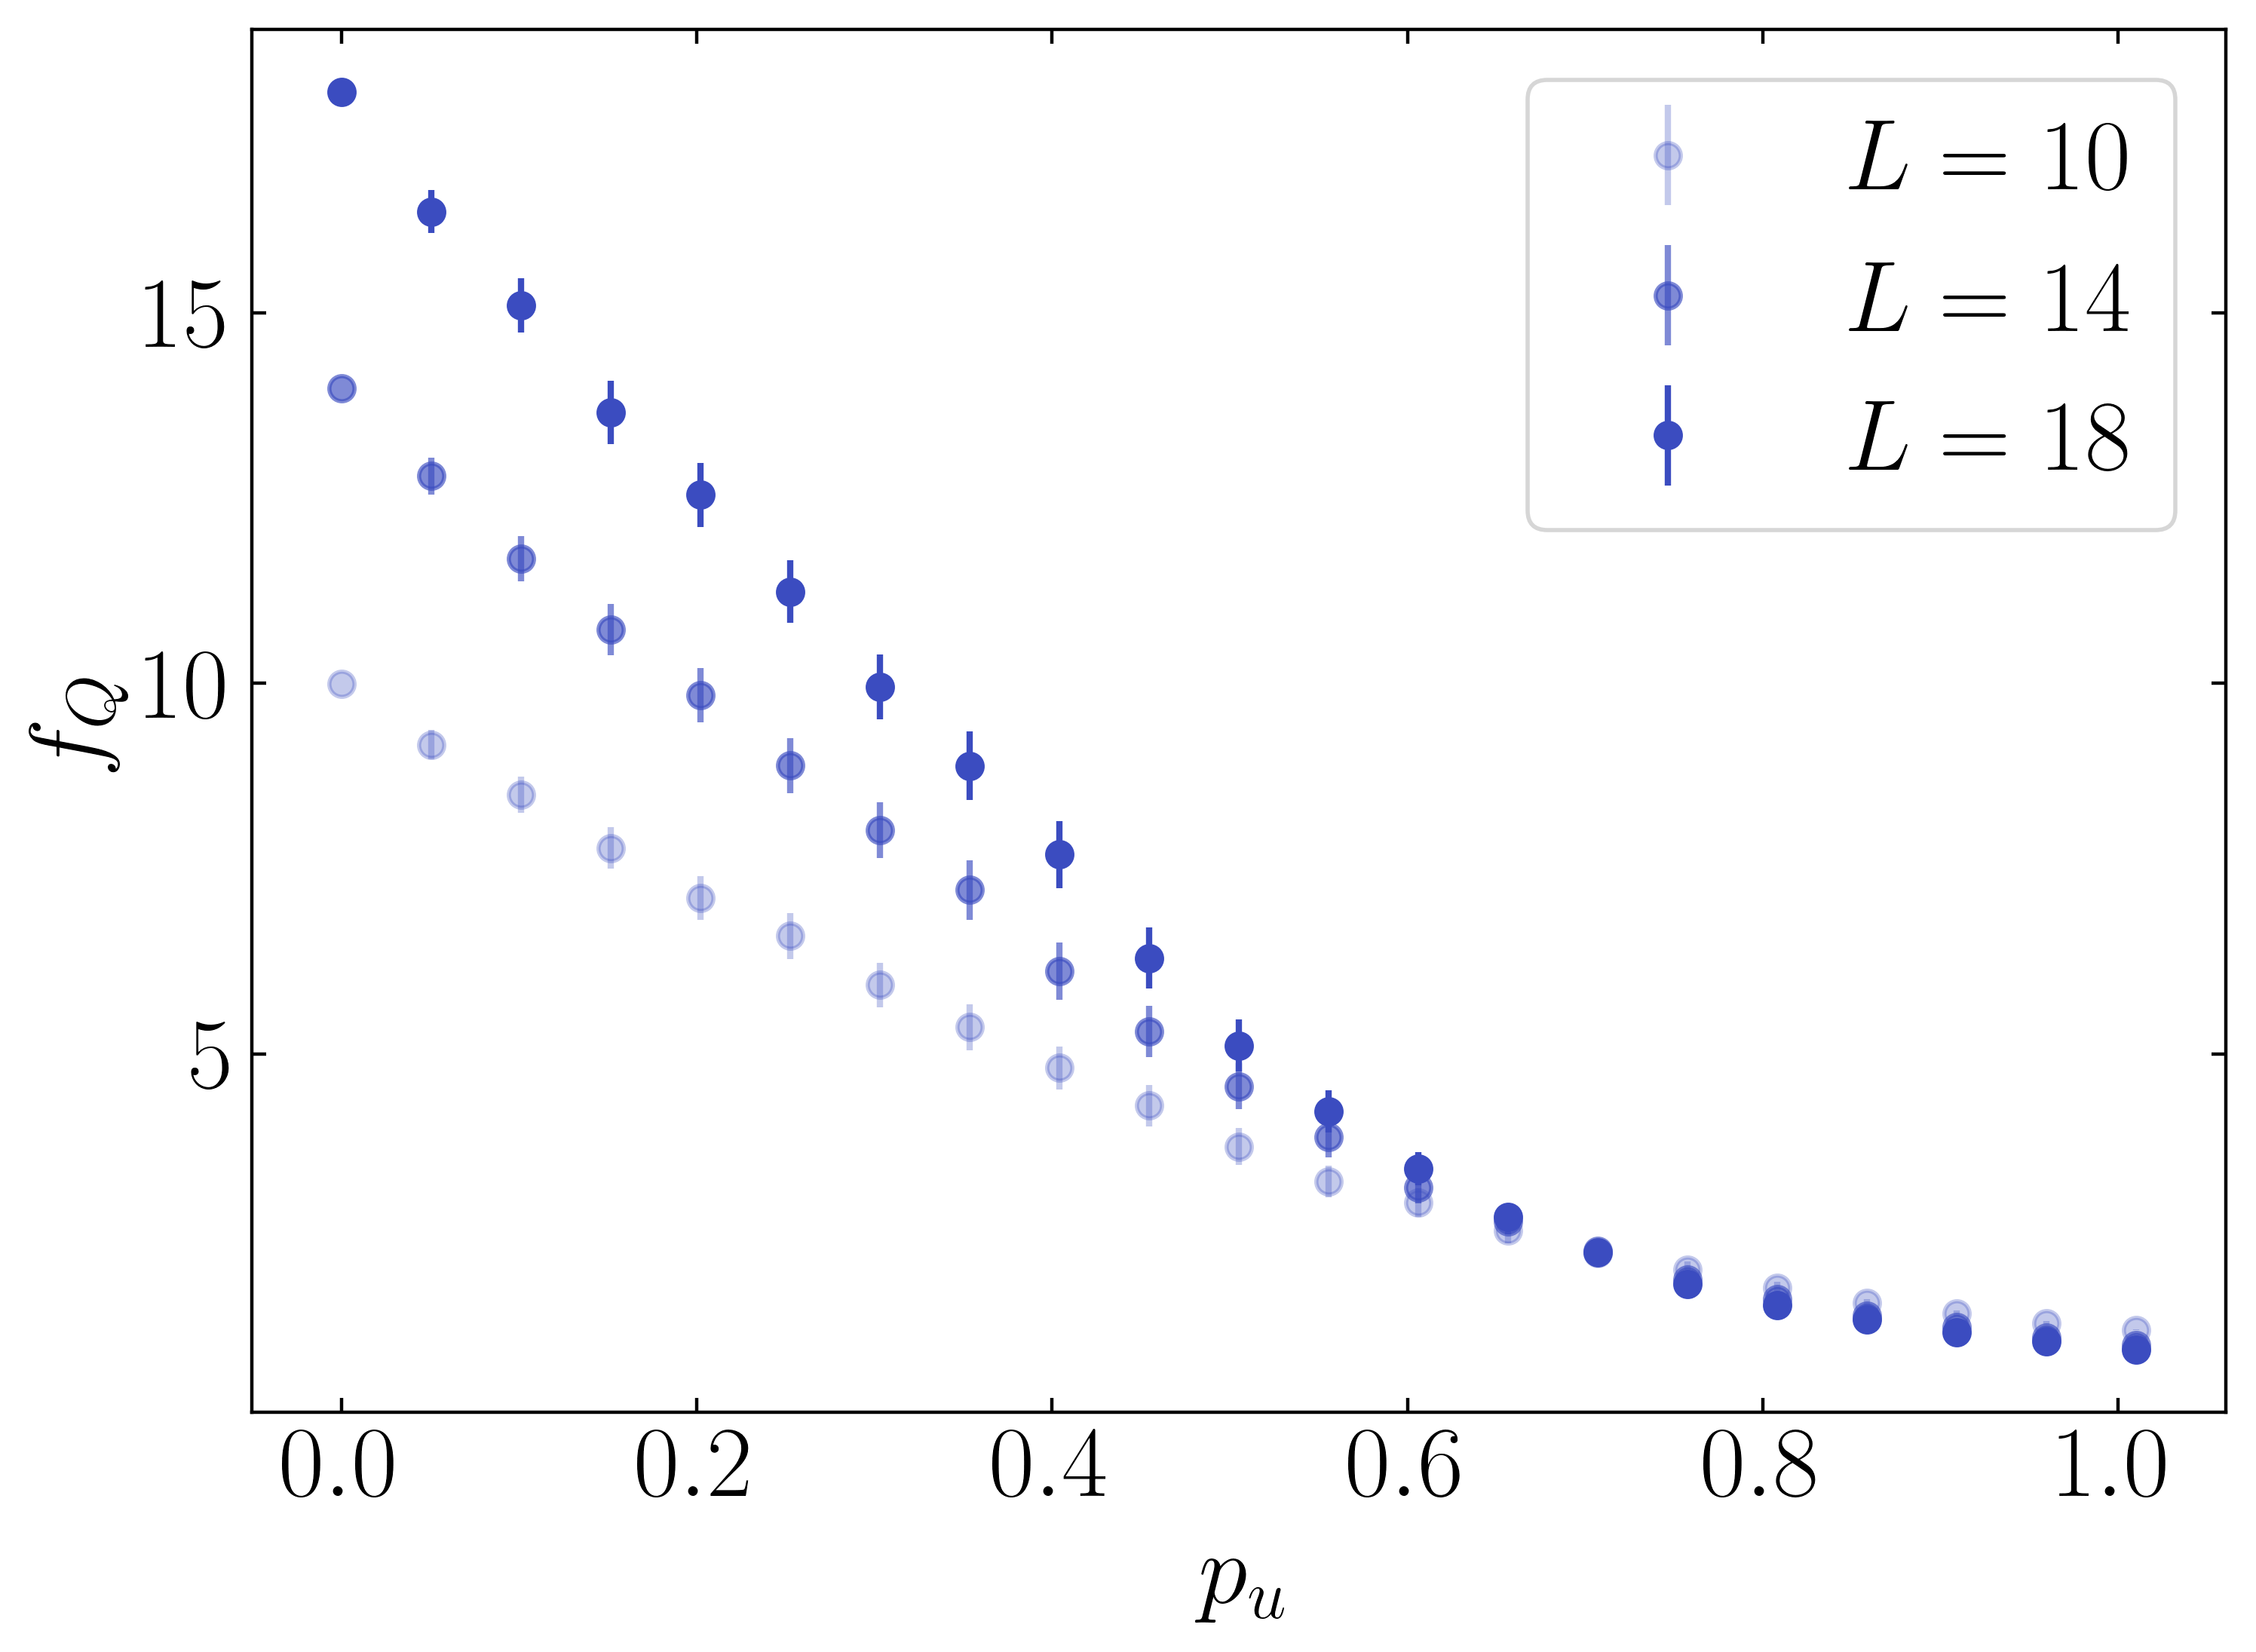

In [ ]:
# Define the subfolder and file pattern
# z2 symmetry

# pz=0 vs xx vs u starting from |00...0>

df = pd.read_csv('results/fig5c.csv')

Ls = [10, 14, 18]

# Plot the results
plt.figure(figsize=(8, 6))
color = '#3B4CC0'
alphas = np.linspace(0.3, 1, len(Ls))

for L_idx, L in enumerate(Ls):
    dfx = df[(df.L==L)]
    x = dfx.pu.values
    y = dfx.qfi_mean.values
    err_y = dfx.qfi_err.values
    plt.errorbar(x, y, err_y,
                 label=f'$L={L}$', color=color, alpha=alphas[L_idx], fmt='o')


plt.xlabel('$p_u$')
plt.ylabel('$f_Q$')
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.legend()
plt.tight_layout()
plt.show()


# Figure S1

In [35]:
def ObjectiveFunction(data, p_c, nu, return_all = False):
    '''
    Function to retrieve the data, 
    and calculate the objective function value of the particular p_c and nu.
    p_c, nu: float. Parameters of the objective function
    Ls: list. If list is empty, take all Ls and do not return data points,
                otherwise, take only data with given Ls
    '''
    
    ofun = 0  
    
    Ls = data[:,0,0]
    
    xs = []
    ys = []
    ds = []
    for l_idx,L in enumerate(Ls):
        if L==max(Ls):
            ps = data[l_idx, 1, 2:-2]
            ys.append(data[l_idx, 2, 2:-2])
            ds.append(data[l_idx, 3, 2:-2])
            for pi in ps:
                xs.append((pi - p_c) * L**(1/nu))         
        else:
            ps = data[l_idx, 1, :]
            ys.append(data[l_idx, 2, :])
            ds.append(data[l_idx, 3, :])
            for pi in ps:
                xs.append((pi - p_c) * L**(1/nu))
    xs = np.array(xs)
    ys = np.concatenate(ys, axis=0)
    ds = np.concatenate(ds, axis=0)
    
    order_idxs = np.argsort(xs)
    xs = xs[order_idxs]
    ys = ys[order_idxs]
    ds = ds[order_idxs]
    
    n = len(xs)
    for i in range(1, n-1):
        x0, x, x2 = xs[i-1], xs[i], xs[i+1]
        y0, y, y2 = ys[i-1], ys[i], ys[i+1]
        d0, d, d2 = ds[i-1], ds[i], ds[i+1]
        
        if abs(x2-x0) > 1e-5:
            ybar = (((x2-x)*y0) - ((x0-x)*y2)) / (x2-x0)
            delta2 = d**2 + (((x2 - x)**2 / (x2 - x0)**2) * d0**2) + (((x0 - x)**2 / (x2 - x0)**2) * d2**2)
            if delta2>0:
                w2 = (y - ybar)**2 / delta2
                ofun += w2
        else:
            a=1
    
    if return_all:
        return ofun/(n-2), xs, ys, ds
    else:
        return ofun/(n-2)
    
def plot_cost_surface(data, probs_c, nus):
    import numpy as np
    import matplotlib.pyplot as plt
    import sys


    pp, nn = np.meshgrid(probs_c, nus)
    of = np.zeros_like(pp)


    for i,p_c in enumerate(tqdm(probs_c)):
        for j,nu in enumerate(nus):
            of[j,i] = ObjectiveFunction(data, p_c, nu)

    #rescaling the function

    min_of = np.min(of) #minimum value of the function

    of = np.log(of/min_of)

    min_idx = np.asarray(of == 0).nonzero() # np.where(of == min_of)
    nu_idx, p_idx = min_idx
    min_p = float(probs_c[p_idx[0]])
    min_nu = float(nus[nu_idx[0]])

    sigma_nu, sigma_p = np.asarray((of<=np.log(1.1))).nonzero()
    p_s, nu_s = probs_c[sigma_p], nus[sigma_nu]
    pdif = [abs(i-j) for i in p_s for j in p_s] #differences in probabilities away from pc
    nudif = [abs(i-j) for i in nu_s for j in nu_s]

    print('min of', min_of, 'pc = ',round(min_p,5),'+-',round(max(pdif), 5), '   nu = ', round(min_nu,1), '+-', round(max(nudif), 1))
    

    return min_p, pdif, min_nu, nudif

main plot
top center


100%|██████████| 100/100 [00:00<00:00, 124.32it/s]


min of 0.1109223973060882 pc =  0.51667 +- 0.00202    nu =  2.5 +- 0.1
top right


100%|██████████| 100/100 [00:01<00:00, 61.19it/s]


min of 1.824944157347444 pc =  0.25657 +- 0.01131    nu =  1.7 +- 0.1
center right


100%|██████████| 100/100 [00:00<00:00, 145.84it/s]


min of 1.0207947308555716 pc =  0.30051 +- 0.00202    nu =  2.0 +- 0.2


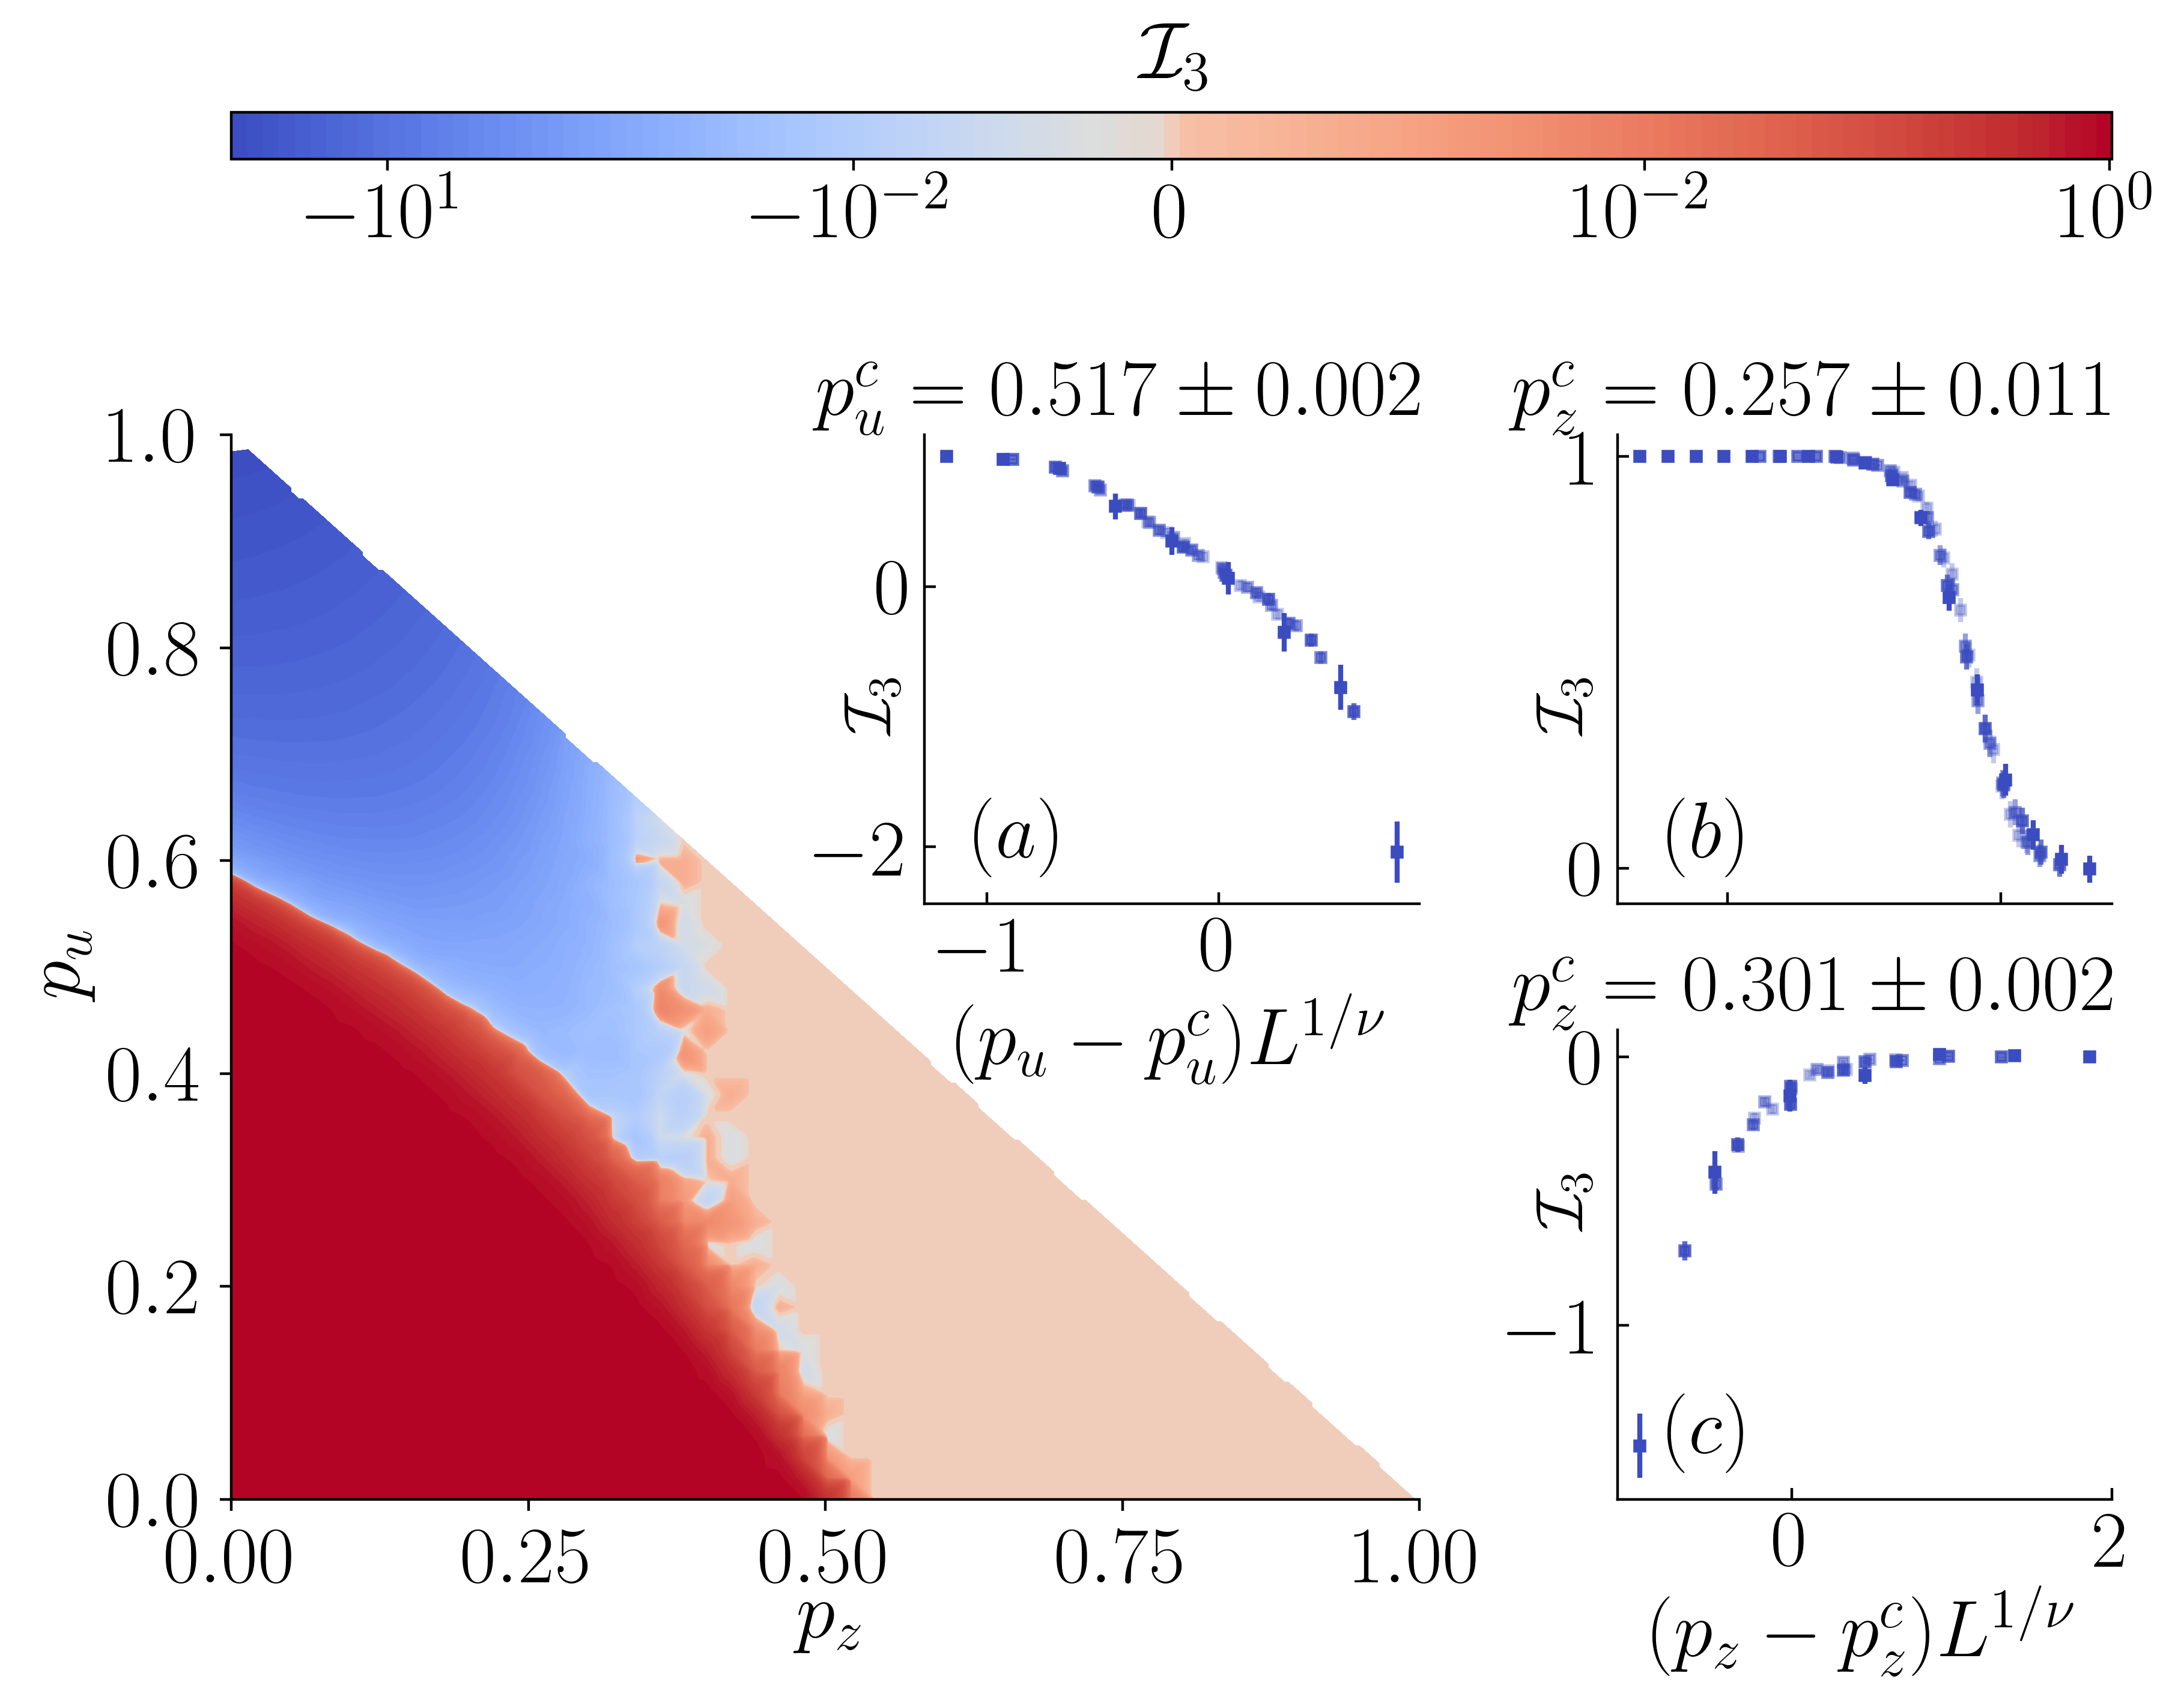

In [ ]:
mpl.rcParams.update({'font.size': 24})
# Create the main figure and grid
fig = plt.figure(figsize=(10.1, 7.5))
grid = plt.GridSpec(4, 3, height_ratios=(0.1,0.05, 1, 1), hspace=0.1, wspace=0.4, )

color = '#3B4CC0'

# Main plot---------------------------------------------------------------------------------------------------
print('main plot')
main_ax = fig.add_subplot(grid[2:, :2])

# entanglement data of surface

# Define file path template
skl = 'triphase/data/surface_entanglement/L{}_seed{}_S_.txt'

ent=[]
L = 256
# for L in [256]:
#     for seed in range(0, 3000):
#         fname = skl.format(L, seed)
#         if os.path.exists(fname):
#             data = np.loadtxt(fname)
#             ent.append(data)
#     # Calculate the average surface data over all seeds
#     if len(ent)>0:
#         batch_size = len(ent)//10

#         smooth_data = [np.mean([ent[i:i+batch_size] for i in range(0, len(ent)-batch_size, batch_size)], axis=0)]
#         smooth_err = [np.std([ent[i:i+batch_size] for i in range(0, len(ent)-batch_size, batch_size)], axis=0)]

#     surf = np.mean(np.array(smooth_data[0]), axis=0)

df = pd.read_csv('results/figS1main.csv')

surf = []
for row in df.iterrows():

    surf.append([row[1]['pz'], row[1]['pu'], row[1]['I_3']])

surf = np.array(surf)

x = surf[:, 0]
y = surf[:, 1]
# z = surf[:,4]
z = surf[:, 2]

grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 300), np.linspace(0, 1, 300))

grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
lvls = np.sort(np.concatenate((-np.logspace(-4, 2, 60), np.logspace(-4,0.01, 60))))

cont = main_ax.contourf(grid_x, grid_y, grid_z, levels=lvls, 
            cmap='coolwarm', norm=mpl.colors.SymLogNorm(linthresh=0.0001, linscale=0.5))

main_ax.tick_params(pad=5)
main_ax.spines[['right', 'top']].set_visible(False)
main_ax.set_ylabel(r'$p_u$')
main_ax.set_xlabel(r'$p_z$', labelpad=-5)
main_ax.set_ylim((0,1))

top_cb_ax = fig.add_subplot(grid[0, :])
cb = fig.colorbar(cont, cax=top_cb_ax,  orientation='horizontal', ticks=[-1e1, -1e-2, 0, 1e-2, 1e0],
                  format=mpl.ticker.LogFormatterMathtext())#, label=r'$f_\mathcal{Q}$')
cb.set_label(r'$\mathcal{I}_3$', labelpad=10)
cb.ax.xaxis.set_ticks_position('bottom')
cb.ax.xaxis.set_label_position('top')

# Top center subplot -----------------------------------------------------------------------------------------
print('top center')
top_center_ax = fig.add_subplot(grid[2, 1])


# entanglement data of surface

skl = 'triphase/data/surface_entanglement/L{}_seed{}_S_.txt'

fs_scaling = []
Ls = [32, 64, 128, 256, 512]
alphas = np.linspace(0.3, 1, len(Ls))

# fs_scaling = np.load('triphase/data/fs_pz100.npy')
fs_scaling = np.load('results/figS1a.npy')

probs_c = np.linspace(0.45, 0.55, 100)
nus = np.linspace(1.5, 3, 100)
pc, e_pc, nuc, e_nuc = plot_cost_surface(fs_scaling, probs_c, nus)


for l_idx, L in enumerate(Ls):
    p = fs_scaling[l_idx, 1, :]
    x = (p-pc) * L **(1/nuc)
    y = fs_scaling[l_idx, 2, :]
    erry = fs_scaling[l_idx, 3, :]
    top_center_ax.errorbar(x, y, erry, label=f'{L}', fmt='s', markersize=3, color=color, alpha=alphas[l_idx])

top_center_ax.set_xlabel(r'$(p_u-p_u^c)L^{1/\nu}$', labelpad=2.0)
top_center_ax.set_title(r'$p_u^c='+str(round(pc, 3))+r'\pm'+str(round(max(e_pc), 3))+'$',
                        loc='right', fontsize='medium')

top_center_ax.tick_params(axis = 'both', which = 'both', direction = 'in', top = False, right = False)

top_center_ax.spines[['right', 'top']].set_visible(False)

top_center_ax.annotate(r'$(a)$', xy=(.1,.1), xycoords='axes fraction')
fig.text(0.39, 0.55, r'$\mathcal{I}_3$', rotation=90, ha='center', va='center', fontsize=20)

# Top right subplot-----------------------------------------------------------------------------------------
print('top right')
top_right_ax = fig.add_subplot(grid[2, 2])

fs_scaling2 = []

Ls = [32, 64, 128, 256]
alphas = np.linspace(0.3, 1, len(Ls))


# fs_scaling2 = np.load('triphase/data/fs_pu360.npy')
fs_scaling2 = np.load('results/figS1b.npy')

probs_c = np.linspace(0.2, 0.28, 100)
nus = np.linspace(1, 3, 100)
pc, e_pc, nuc, e_nuc = plot_cost_surface(fs_scaling2, probs_c, nus)

for l_idx, L in enumerate(Ls):
    p = fs_scaling2[l_idx, 1, :]
    x = (p-pc) * L **(1/nuc)
    y = fs_scaling2[l_idx, 2, :]
    erry = fs_scaling2[l_idx, 3, :]
    top_right_ax.errorbar(x, y, erry, label=f'{L}', fmt='s', 
                          markersize=3, color=color, alpha=alphas[l_idx])

# axs[1].legend()
# top_right_ax.set_xlabel(r'$(p-p_c)L^{1/\nu}$')
top_right_ax.set_title(r'$p_z^c='+str(round(pc, 3))+r'\pm '+str(round(max(e_pc), 3))+'$',
                        loc='right', fontsize='medium')

                
top_right_ax.tick_params(axis = 'both', which = 'both', direction = 'in', labelbottom=False,
                         top = False, right = False)

top_right_ax.spines[['right', 'top']].set_visible(False)

top_right_ax.annotate(r'$(b)$', xy=(.1,.1), xycoords='axes fraction')
fig.text(0.675, 0.55, r'$\mathcal{I}_3$', rotation=90, ha='center', va='center', fontsize=20)

# Center right subplot-----------------------------------------------------------------------------------------
print('center right')
center_right_ax = fig.add_subplot(grid[3, 2])

fs_scaling3 = []
Ls = [32, 64, 128, 256, 512]
alphas = np.linspace(0.3, 1, len(Ls))


# fs_scaling3 = np.load('triphase/data/fs_pxx100.npy')
fs_scaling3 = np.load('results/figS1c.npy')

probs_c = np.linspace(0.25, 0.35, 100)
nus = np.linspace(1.1, 2.1, 100)
pc, e_pc, nuc, e_nuc = plot_cost_surface(fs_scaling3, probs_c, nus)

for l_idx, L in enumerate(Ls):
    p = fs_scaling3[l_idx, 1, :]
    x = (p-pc) * L **(1/nuc)
    y = fs_scaling3[l_idx, 2, :]
    erry = fs_scaling3[l_idx, 3, :]
    center_right_ax.errorbar(x, y, erry, label=f'{L}', fmt='s', 
                          markersize=3, color=color, alpha=alphas[l_idx])
                
center_right_ax.tick_params(axis = 'both', which = 'both', direction = 'in', top = False, right = False)

center_right_ax.set_xlabel(r'$(p_z-p_z^c)L^{1/\nu}$', labelpad=1)
center_right_ax.set_title(r'$p_z^c='+str(round(pc, 3))+r'\pm'+str(round(max(e_pc), 3))+'$',
                        loc='right', fontsize='medium')
center_right_ax.spines[['right', 'top']].set_visible(False)
# center_right_ax.legend(framealpha=0.0, frameon=False)
center_right_ax.annotate(r'$(c)$', xy=(.1,.1), xycoords='axes fraction')
fig.text(0.675, 0.275, r'$\mathcal{I}_3$', rotation=90, ha='center', va='center', fontsize=20)

grid.update(hspace=0.5)

plt.show()

# Figure S2

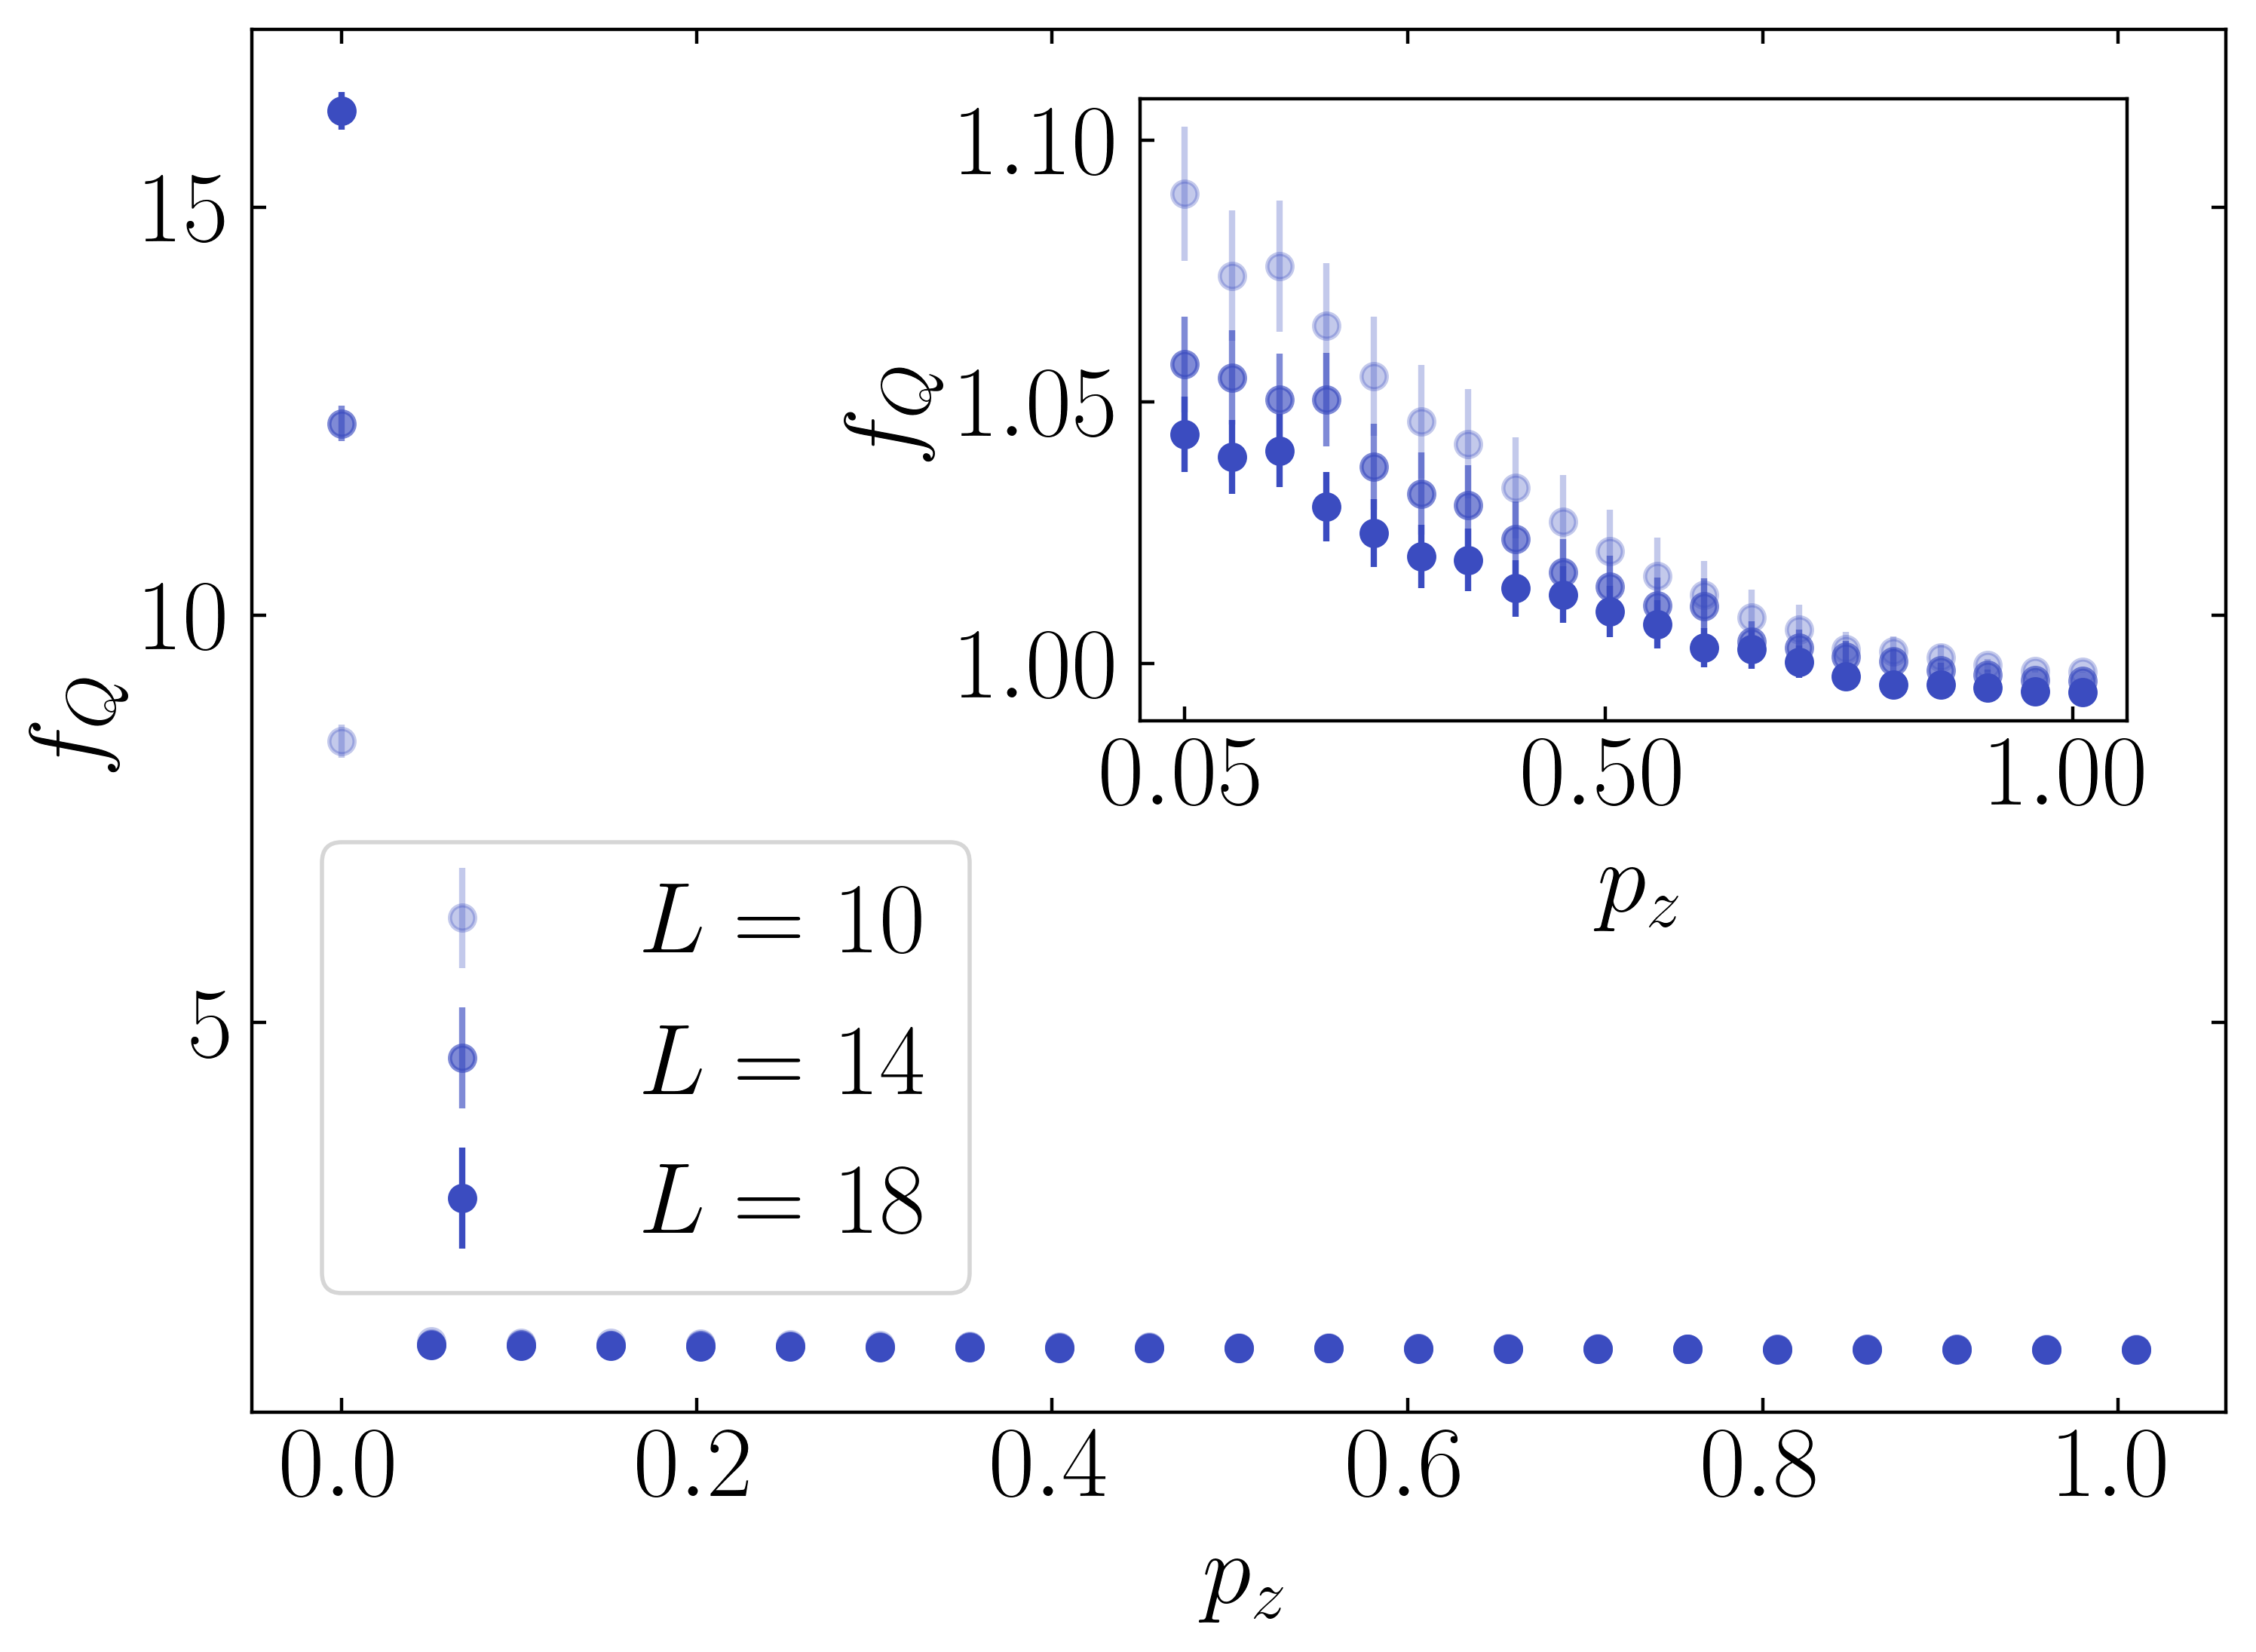

In [ ]:

df = pd.read_csv('results/figS2a.csv')


Ls = [10, 14, 18]

# Plot the results
f, ax = plt.subplots(figsize=(8, 6))
axins = ax.inset_axes([0.45, 0.5, 0.5, 0.45])
axs = [ax, axins]

color = '#3B4CC0'
alphas = np.linspace(0.3, 1, len(Ls))

for L_idx, L in enumerate(Ls):
    dfx = df[(df.L==L)]
    x = dfx.pz.values
    y = dfx.qfi_mean.values
    err_y = dfx.qfi_err.values
    axs[0].errorbar(x, y, err_y,
                 label=f'$L={L}$', color=color, alpha=alphas[L_idx], fmt='o')
    axs[1].errorbar(x[1:], y[1:], yerr=err_y[1:],
                    color=color, alpha=alphas[L_idx], fmt='o')


axs[0].set_xlabel('$p_z$')
axs[0].set_ylabel('$f_Q$')
axs[0].legend(loc='lower left', bbox_to_anchor=(0.01, 0.05))

axs[1].set_xticks([0.05, 0.5, 1], minor=False)
axs[1].tick_params(axis='both', which='both', direction='in')
axs[1].set_xlabel('$p_z$')
axs[1].set_ylabel('$f_Q$')


plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tight_layout()
plt.show()

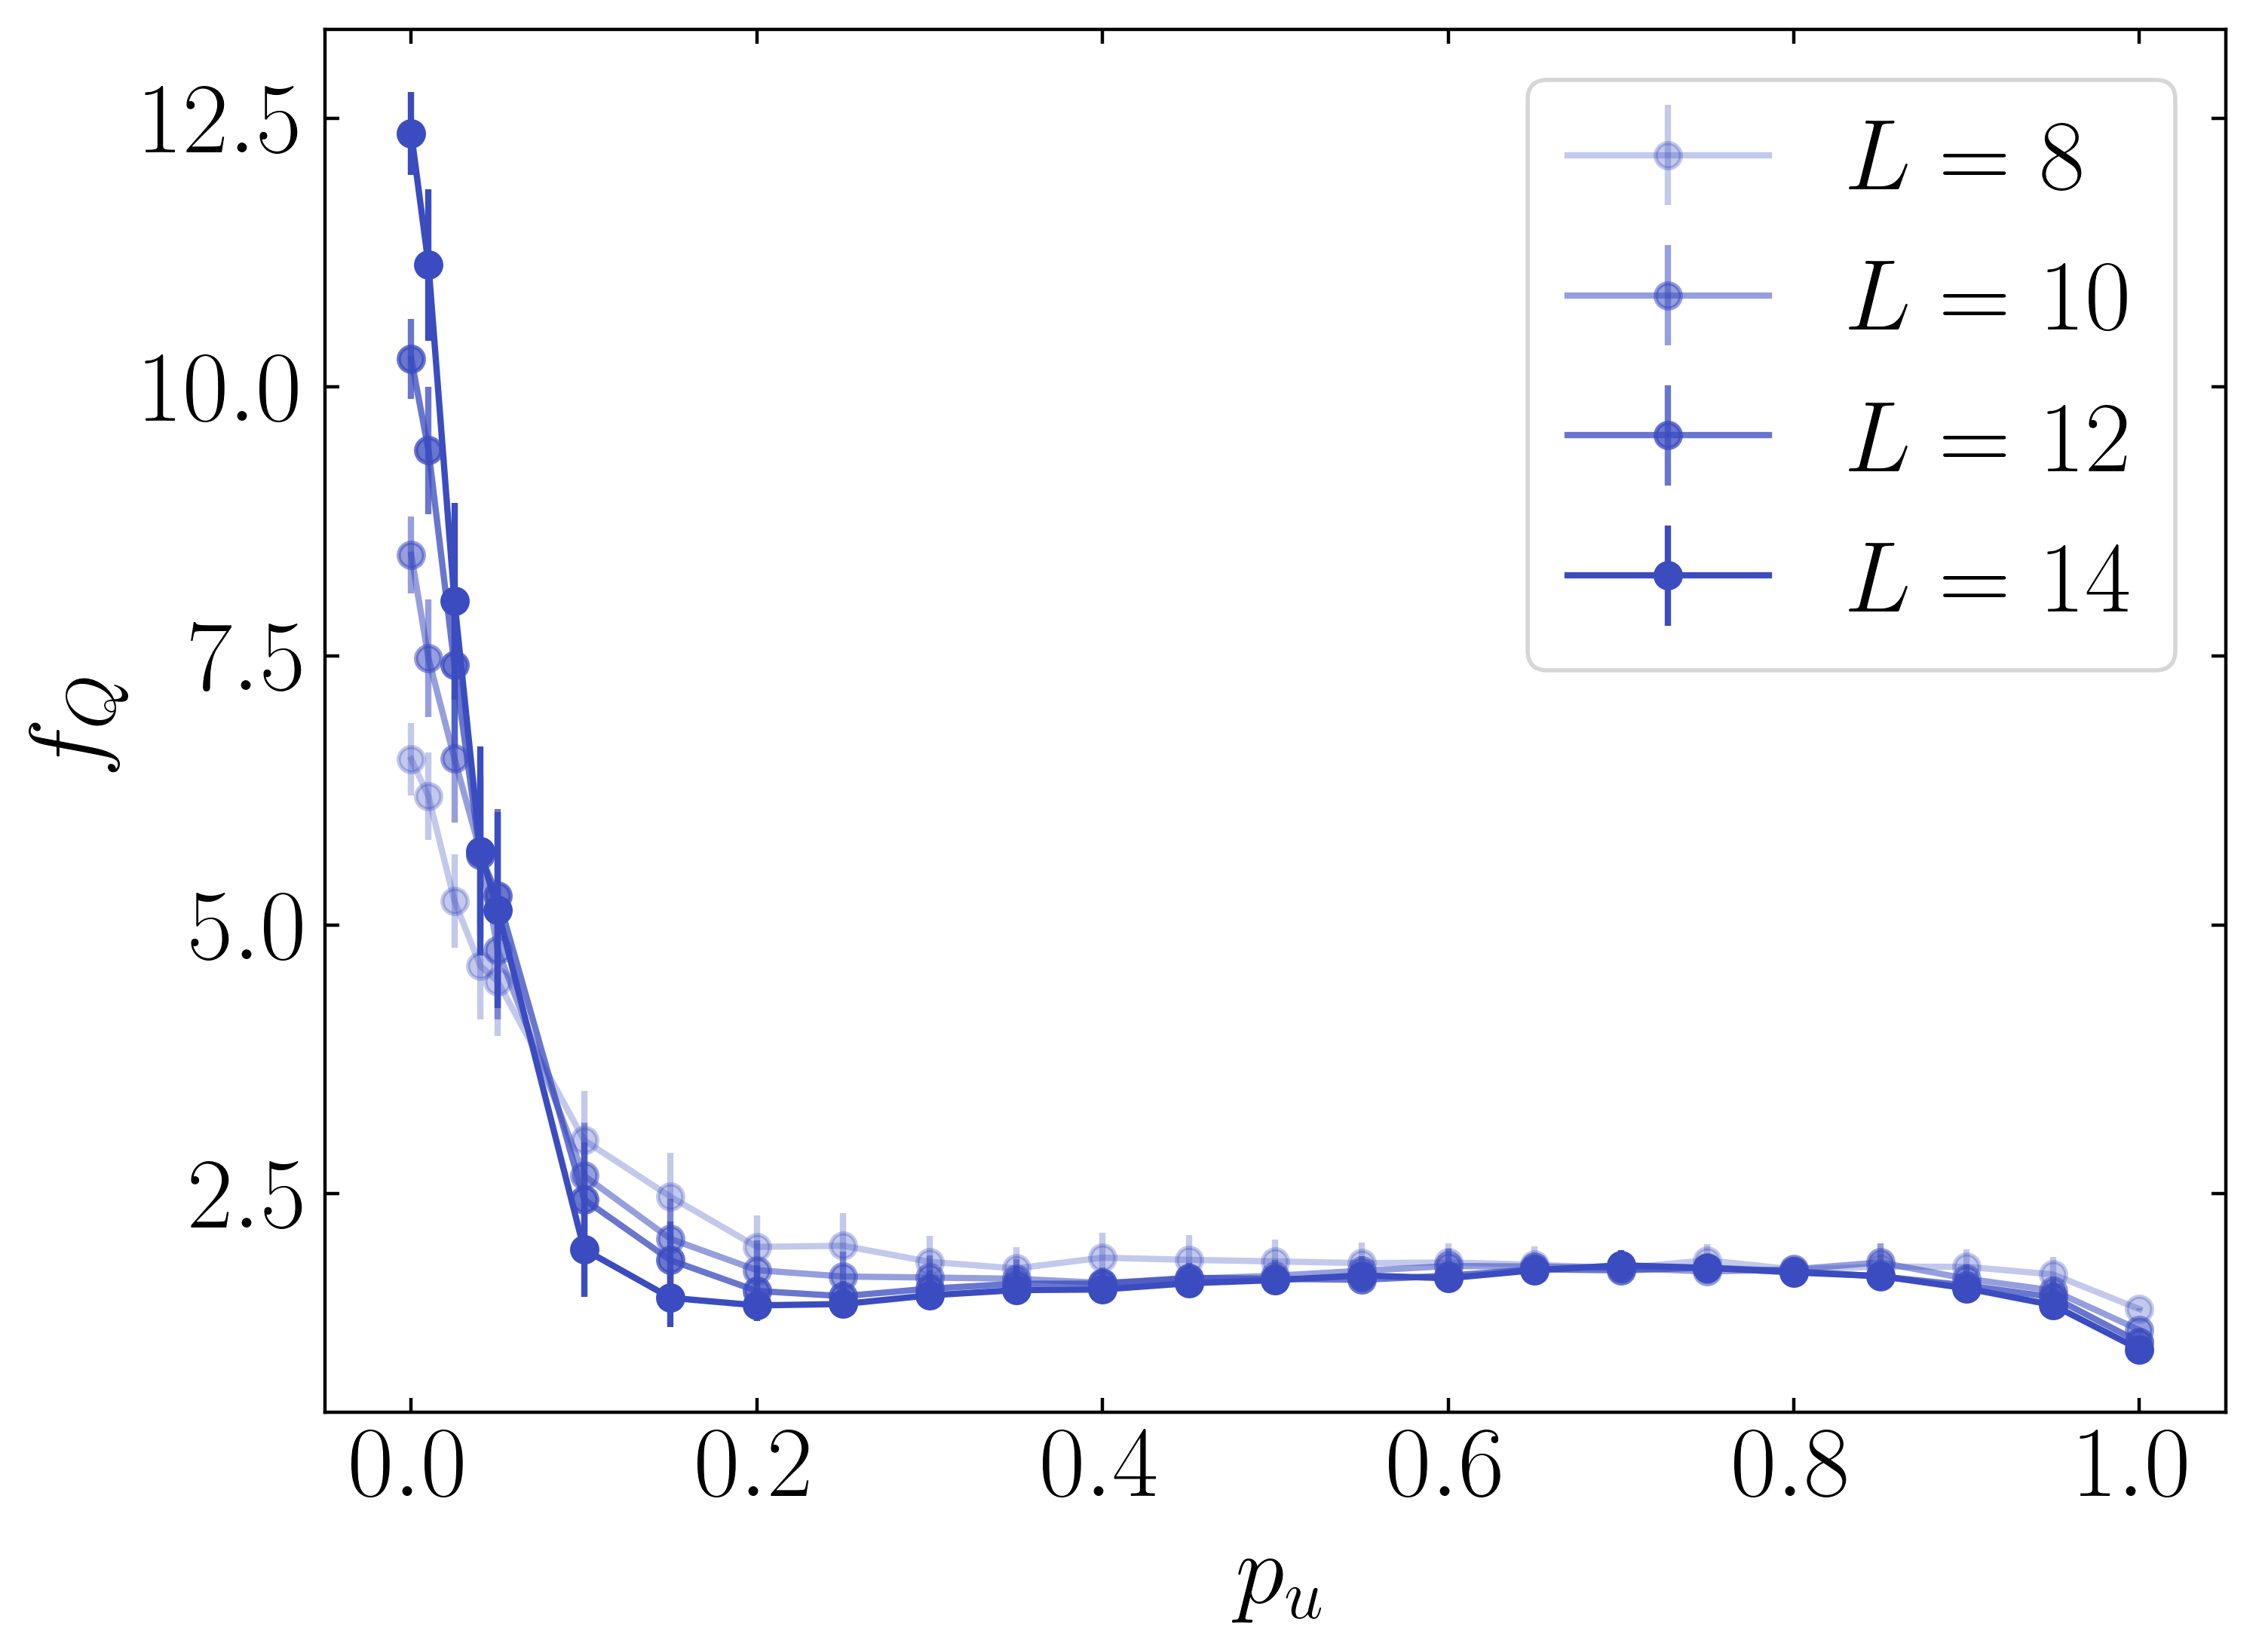

In [ ]:
subfolder = '/scratch/alirasol/u1_data/'
skl = 'L{}_seed{}_S_0.0_.txt'

Ls = [8, 10, 12, 14]

color = '#3B4CC0'
alphas = np.linspace(0.3, 1, len(Ls))

plt.figure(figsize=(8, 6))

df = pd.read_csv('results/figS2b.csv')

for l_idx, L in enumerate(Ls):
    x = df[df.L==L].pu.values
    y = df[df.L==L].qfi_mean.values
    err_y = df[df.L==L].qfi_err.values

    order = np.argsort(x)
    plt.errorbar(x[order], y[order], err_y[order],
                 label=f'$L={L}$', color=color,
                 alpha=alphas[l_idx], fmt='-o')



plt.xlabel(r'$p_u$')
plt.ylabel(r'$f_Q$')
plt.legend()
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True)
plt.tight_layout()
plt.show()



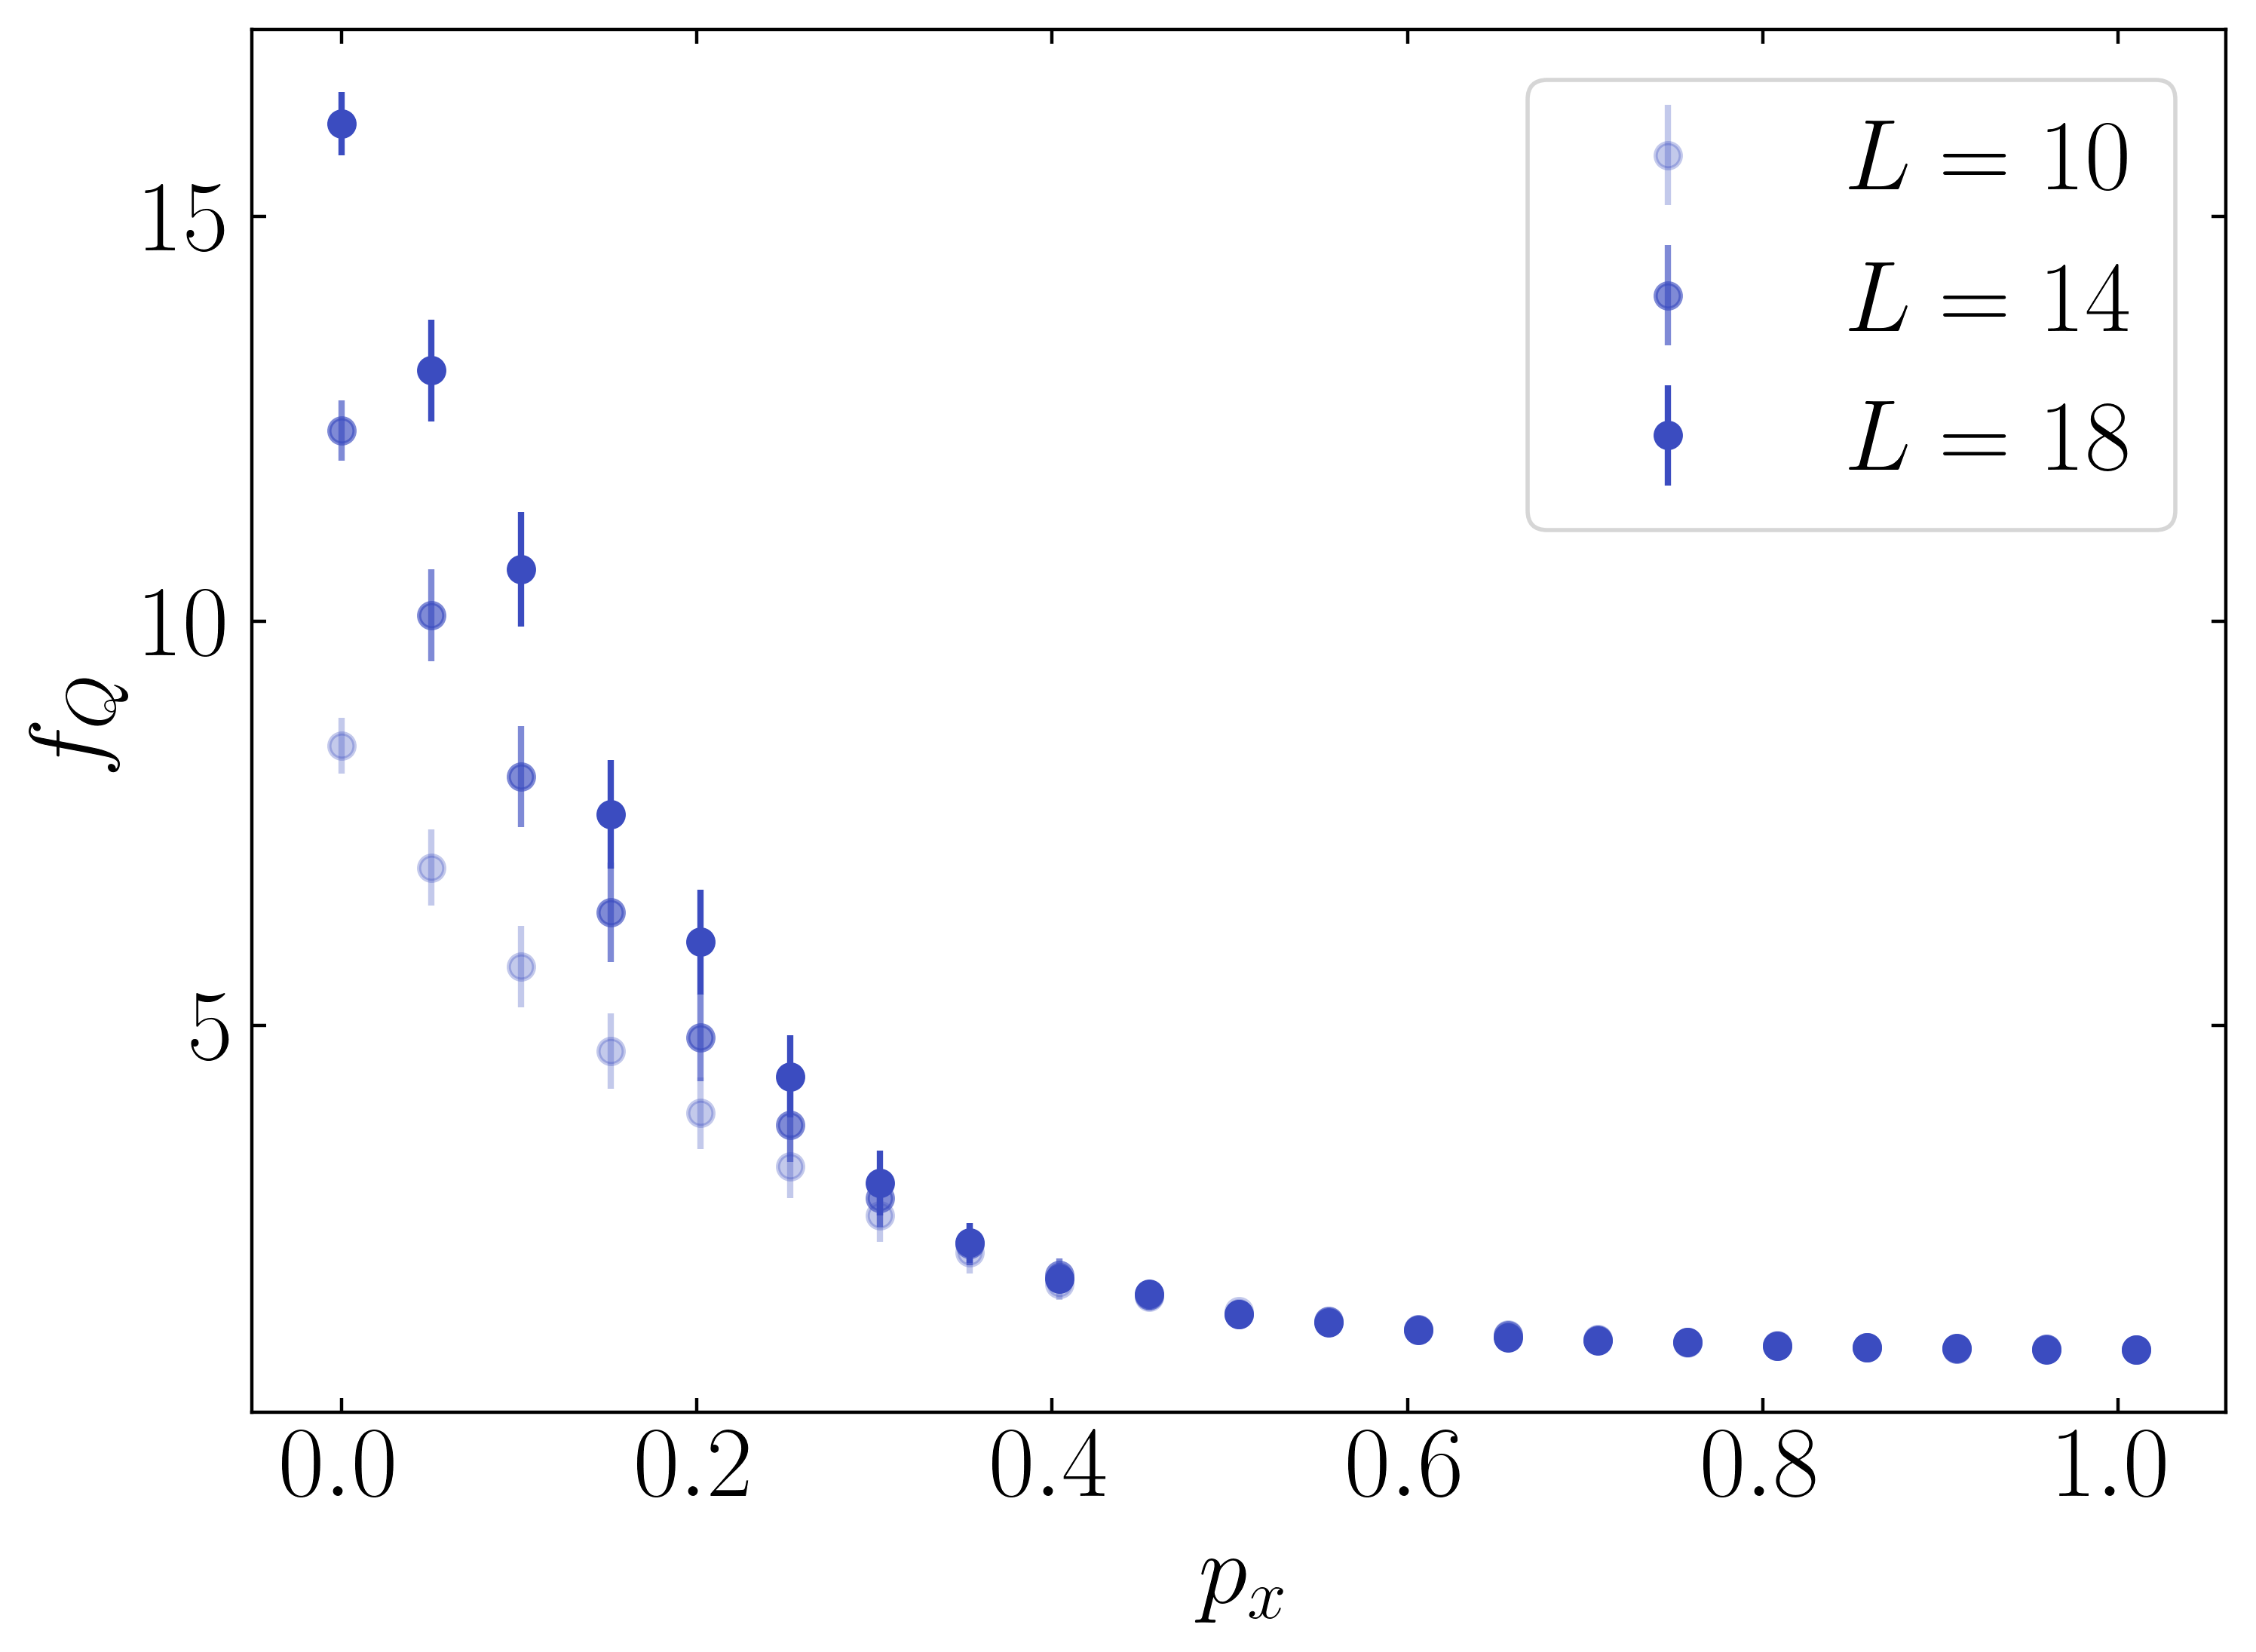

In [ ]:
# Define the subfolder and file pattern

df = pd.read_csv('results/figS2c.csv')

subfolder = 'u1_data_px/scratch/alirasol/u1_data/'
skl = 'L{}_seed{}_2_.txt'

Ls = [10, 14, 18]


plt.figure(figsize=(8, 6))

color = '#3B4CC0'
alphas = np.linspace(0.3, 1, len(Ls))

for L_idx, L in enumerate(Ls):
    x = df[df.L==L].px.values
    y = df[df.L==L].qfi_mean.values
    err_y = df[df.L==L].qfi_err.values
    plt.errorbar(x, y, yerr=err_y, label=f'$L={L}$',
                 color=color, alpha=alphas[L_idx], fmt='o')

plt.xlabel('$p_x$')
plt.ylabel('$f_Q$')
plt.legend()

plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tight_layout()
plt.show()